In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [9]:
train = pd.read_csv(r"C:\Users\ismai\Downloads\archive (24)\ALLtrainMescla5D.csv")
test = pd.read_csv(r"C:\Users\ismai\Downloads\archive (24)\ALLtestMescla5D.csv")


In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [11]:
train_24_x = train[['machineID', 'time_in_cycles', 'voltmean_24h',
       'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h',
       'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h', 'error1', 'error2',
       'error3', 'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4', 'age', 'DI']]
train_24_y = train['RUL']

test_24_x = test[['machineID', 'time_in_cycles', 'voltmean_24h',
       'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h',
       'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h', 'error1', 'error2',
       'error3', 'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4', 'age', 'DI']]
test_24_y = test['RUL']

In [13]:
train_5_x = train[['machineID', 'time_in_cycles', 'voltmean_5d',
       'rotatemean_5d', 'pressuremean_5d', 'vibrationmean_5d', 'voltsd_5d',
       'rotatesd_5d', 'pressuresd_5d', 'vibrationsd_5d', 'error1', 'error2',
       'error3', 'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4',
       'age', 'DI']]
train_5_y = train['RUL']

test_5_x = test[['machineID', 'time_in_cycles',  'voltmean_5d',
       'rotatemean_5d', 'pressuremean_5d', 'vibrationmean_5d', 'voltsd_5d',
       'rotatesd_5d', 'pressuresd_5d', 'vibrationsd_5d', 'error1', 'error2',
       'error3', 'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4',
       'age', 'DI']]
test_5_y = test['RUL']


In [56]:
def models_all(i,x_train,y_train,x_test,y_test):
    model = i
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {
        "MAE":mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "predictions": predictions
    }


In [16]:
models_dict = {
    "RandomForest": RandomForestRegressor(),

    "Bagging": BaggingRegressor(
        random_state=42
    ),

    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor()
}


In [18]:
results_24 = {}

for name, model in models_dict.items():
    results_24[name] = models(model,train_24_x,train_24_y,test_24_x,test_24_y)

results_df_24 = pd.DataFrame(results_24).T

Learning rate set to 0.066169
0:	learn: 38.6330006	total: 139ms	remaining: 2m 18s
1:	learn: 37.0891942	total: 141ms	remaining: 1m 10s
2:	learn: 35.6716449	total: 143ms	remaining: 47.4s
3:	learn: 34.3774345	total: 144ms	remaining: 36s
4:	learn: 33.2401769	total: 146ms	remaining: 29.1s
5:	learn: 32.1521477	total: 148ms	remaining: 24.6s
6:	learn: 31.1556679	total: 150ms	remaining: 21.3s
7:	learn: 30.1512465	total: 152ms	remaining: 18.9s
8:	learn: 29.3054895	total: 155ms	remaining: 17s
9:	learn: 28.5147409	total: 157ms	remaining: 15.5s
10:	learn: 27.8144533	total: 159ms	remaining: 14.3s
11:	learn: 27.1195286	total: 161ms	remaining: 13.2s
12:	learn: 26.4765057	total: 163ms	remaining: 12.3s
13:	learn: 25.8044049	total: 164ms	remaining: 11.6s
14:	learn: 25.2426906	total: 166ms	remaining: 10.9s
15:	learn: 24.7160184	total: 168ms	remaining: 10.4s
16:	learn: 24.2808052	total: 171ms	remaining: 9.87s
17:	learn: 23.8825875	total: 173ms	remaining: 9.41s
18:	learn: 23.3969812	total: 174ms	remaining: 

In [24]:
results_df_24

,MAE,MSE,RMSE,R2,predictions
RandomForest,10.383863,611.930906,24.737237,0.63201,"[1.0, 1.98, 2.92, 3.86, 4.5, 6.02, 7.1, 7.81, ..."
Bagging,11.590861,694.83047,26.359637,0.582157,"[1.0, 2.0, 3.0, 3.8, 4.8, 6.2, 7.3, 7.7, 9.3, ..."
XGBoost,9.59398,498.349488,22.323743,0.700313,"[1.5476235, 3.1172843, 3.0547783, 3.4410815, 4..."
CatBoost,6.724746,219.837821,14.826929,0.867799,"[0.9567054690399104, 2.2981420074981287, 2.945..."


In [21]:
test['predictions_24_rf'] = results_df_24['predictions']['RandomForest']
test['predictions_24_bgg'] = results_df_24['predictions']['Bagging']
test['predictions_24_xgb'] = results_df_24['predictions']['XGBoost']
test['predictions_24_cb'] = results_df_24['predictions']['CatBoost']

In [22]:
results_5 = {}

for name, model in models_dict.items():
    results_5[name] = models(model,train_5_x,train_5_y,test_5_x,test_5_y)

results_df_5 = pd.DataFrame(results_5).T

Learning rate set to 0.066169
0:	learn: 38.6330006	total: 2.18ms	remaining: 2.18s
1:	learn: 37.0891942	total: 4.66ms	remaining: 2.33s
2:	learn: 35.6716449	total: 6.71ms	remaining: 2.23s
3:	learn: 34.3774345	total: 8.76ms	remaining: 2.18s
4:	learn: 33.2401769	total: 10.8ms	remaining: 2.16s
5:	learn: 32.1521477	total: 12.8ms	remaining: 2.13s
6:	learn: 31.1556679	total: 14.9ms	remaining: 2.11s
7:	learn: 30.1512465	total: 16.9ms	remaining: 2.09s
8:	learn: 29.3054895	total: 19.1ms	remaining: 2.1s
9:	learn: 28.5147409	total: 21.2ms	remaining: 2.1s
10:	learn: 27.8144533	total: 23.3ms	remaining: 2.09s
11:	learn: 27.1195286	total: 25.3ms	remaining: 2.08s
12:	learn: 26.4765057	total: 27.2ms	remaining: 2.06s
13:	learn: 25.8044049	total: 29.2ms	remaining: 2.06s
14:	learn: 25.2426906	total: 31.4ms	remaining: 2.06s
15:	learn: 24.7160184	total: 33.4ms	remaining: 2.05s
16:	learn: 24.2808052	total: 35.5ms	remaining: 2.05s
17:	learn: 23.8825875	total: 37.9ms	remaining: 2.06s
18:	learn: 23.3969812	total:

In [28]:
results_df_5

,MAE,MSE,RMSE,R2,predictions
RandomForest,10.667659,606.100509,24.619109,0.635516,"[1.02, 2.07, 2.94, 4.1, 4.93, 5.91, 7.06, 8.0,..."
Bagging,11.50064,679.35555,26.06445,0.591463,"[1.1, 2.0, 3.0, 4.0, 4.9, 5.9, 7.4, 8.0, 9.4, ..."
XGBoost,10.220612,579.859769,24.080278,0.651296,"[1.4307898, 3.668174, 0.7157538, 1.2488204, 2...."
CatBoost,6.707536,218.740803,14.789889,0.868458,"[1.3282614657310816, 2.7869041037451225, 3.811..."


In [25]:
test['predictions_5_rf'] = results_df_5['predictions']['RandomForest']
test['predictions_5_bgg'] = results_df_5['predictions']['Bagging']
test['predictions_5_xgb'] = results_df_5['predictions']['XGBoost']
test['predictions_5_cb'] = results_df_5['predictions']['CatBoost']

In [26]:
test.columns

Index(['machineID', 'datetime', 'time_in_cycles', 'voltmean_24h',
       'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h',
       'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h', 'voltmean_5d',
       'rotatemean_5d', 'pressuremean_5d', 'vibrationmean_5d', 'voltsd_5d',
       'rotatesd_5d', 'pressuresd_5d', 'vibrationsd_5d', 'error1', 'error2',
       'error3', 'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4',
       'model', 'age', 'DI', 'RULWeek', 'failure', 'failed', 'RUL', 'RUL_I',
       'predictions_24_rf', 'predictions_24_bgg', 'predictions_24_xgb',
       'predictions_24_cb', 'predictions_5_rf', 'predictions_5_bgg',
       'predictions_5_xgb', 'predictions_5_cb'],
      dtype='object')

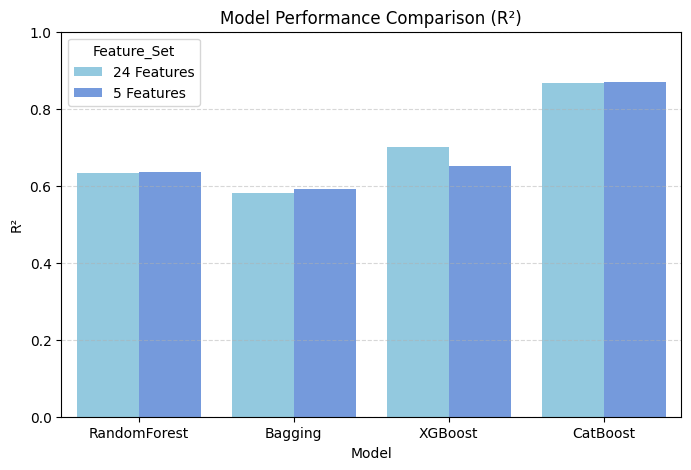

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models
models = ['RandomForest', 'Bagging', 'XGBoost', 'CatBoost']

# R² values from your dataframes
r2_24 = results_df_24.loc[models, 'R2'].values
r2_5  = results_df_5.loc[models, 'R2'].values

# Create a long-form dataframe
df_plot = pd.DataFrame({
    'Model': models*2,
    'Feature_Set': ['24 Features']*len(models) + ['5 Features']*len(models),
    'R2': list(r2_24) + list(r2_5)
})

# Plot with Seaborn
plt.figure(figsize=(8,5))
sns.barplot(data=df_plot, x='Model', y='R2', hue='Feature_Set', palette=['skyblue','cornflowerblue'])

plt.title('Model Performance Comparison (R²)')
plt.ylim(0, 1)
plt.ylabel('R²')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example: results_df from previous step
# rows = model names, columns = ["MAE", "MSE", "RMSE", "R2"]

plt.figure(figsize=(10,6))
plt.bar(results_df.index, results_df["R2"], color='skyblue')
plt.ylabel("R² score")
plt.xlabel("Models")
plt.title("Comparison of R² Scores Across Models")
plt.ylim(0,1)  # since R² is between 0 and 1
plt.xticks(rotation=45, ha='right')  # rotate labels if long
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: annotate bars with values
for i, v in enumerate(results_df["R2"]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()


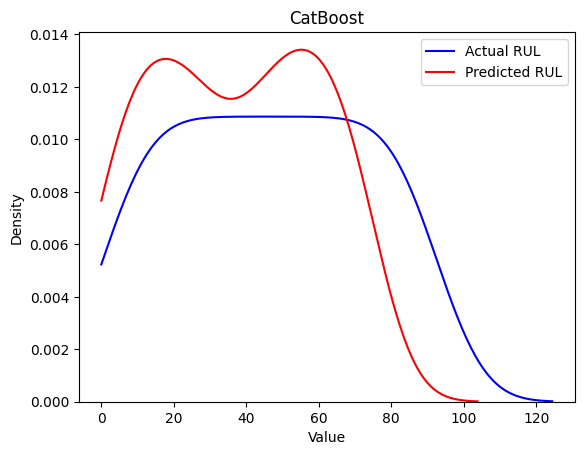

In [37]:
number = 26
actual_RUL = test[test['machineID'] == number]['RUL']   # Distribution 1
prediction_RUL = test[test['machineID'] == number]['predictions_24_cb'] # Distribution 2
import seaborn as sns

sns.kdeplot(actual_RUL, color='blue', label='Actual RUL', fill=False, clip=(0, None))
sns.kdeplot(prediction_RUL, color='red', label='Predicted RUL', fill=False, clip=(0, None))


plt.xlabel('Value')
plt.ylabel('Density')
plt.title('CatBoost')
plt.legend()
plt.show()


In [ ]:

import numpy as np
noise_level = 0.05 ,0.1,0.15,0.20 # 5% noise
test_24_x_noisy = test_24_x + noise_level * np.random.normal(0, test_24_x.std(axis=0), test_24_x.shape)


results_5 = {}

for name, model in models_dict.items():
    results_5[name] = models(model,train_24_x,train_24_y,test_24_x_noisy,test_24_y)

results_df_5 = pd.DataFrame(results_5).T

In [57]:
import numpy as np
import pandas as pd

# Define noise levels
noise_levels = [0.05, 0.1, 0.15, 0.2]  # 5%, 10%, 15%, 20% noise

# Dictionary to store results
results_noise = {}

for noise in noise_levels:
    # Inject Gaussian noise proportional to feature std
    test_noisy = test_24_x + noise * np.random.normal(0, test_24_x.std(axis=0), test_24_x.shape)
    
    # Dictionary to store metrics for this noise level
    results_models = {}
    
    for name, model in models_dict.items():
        results_models[name] = models_all(model, train_24_x, train_24_y, test_noisy, test_24_y)
    
    results_noise[f"{int(noise*100)}% noise"] = results_models

# Convert nested dict to multi-index DataFrame
results_df_noise = pd.DataFrame({(noise, model): metrics 
                                 for noise, models in results_noise.items() 
                                 for model, metrics in models.items()}).T

results_df_noise.index.names = ['Noise_Level', 'Model']
print(results_df_noise)


Learning rate set to 0.066169
0:	learn: 38.6330006	total: 2.3ms	remaining: 2.3s
1:	learn: 37.0891942	total: 4.35ms	remaining: 2.17s
2:	learn: 35.6716449	total: 6.74ms	remaining: 2.24s
3:	learn: 34.3774345	total: 8.91ms	remaining: 2.22s
4:	learn: 33.2401769	total: 10.9ms	remaining: 2.17s
5:	learn: 32.1521477	total: 13ms	remaining: 2.15s
6:	learn: 31.1556679	total: 15ms	remaining: 2.12s
7:	learn: 30.1512465	total: 16.9ms	remaining: 2.1s
8:	learn: 29.3054895	total: 19ms	remaining: 2.1s
9:	learn: 28.5147409	total: 21ms	remaining: 2.08s
10:	learn: 27.8144533	total: 23.3ms	remaining: 2.1s
11:	learn: 27.1195286	total: 25.5ms	remaining: 2.1s
12:	learn: 26.4765057	total: 27.4ms	remaining: 2.08s
13:	learn: 25.8044049	total: 29.4ms	remaining: 2.07s
14:	learn: 25.2426906	total: 31.4ms	remaining: 2.06s
15:	learn: 24.7160184	total: 33.5ms	remaining: 2.06s
16:	learn: 24.2808052	total: 35.5ms	remaining: 2.05s
17:	learn: 23.8825875	total: 37.5ms	remaining: 2.04s
18:	learn: 23.3969812	total: 39.4ms	rema

In [66]:
results_df_noise.xs('CatBoost', level='Model')


,MAE,MSE,RMSE,R2,predictions
Noise_Level,,,,,
5% noise,10.582509,398.501926,19.962513,0.760357,"[1.3427682897944067, -1.3821861355414455, 2.82..."
10% noise,13.017714,497.122561,22.296245,0.701051,"[1.7957980470902015, 2.8870315653802834, 4.464..."
15% noise,14.221813,559.065683,23.64457,0.663801,"[-4.624749642113585, 2.9001706838900674, 1.217..."
20% noise,14.904236,587.423791,24.236827,0.646747,"[1.1281609747178933, -1.6015210328186953, 0.46..."


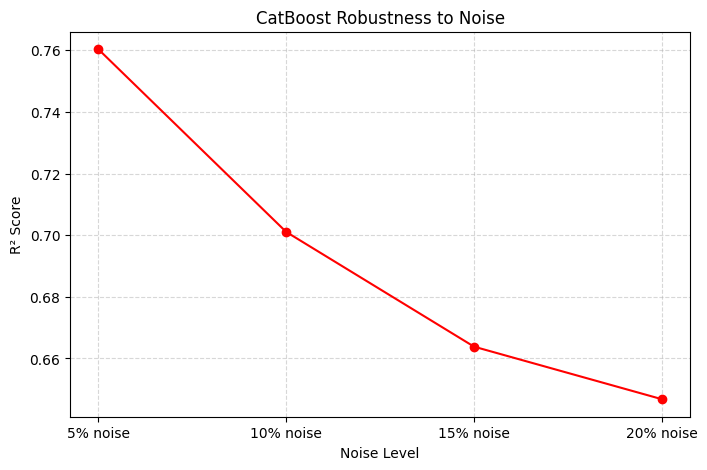

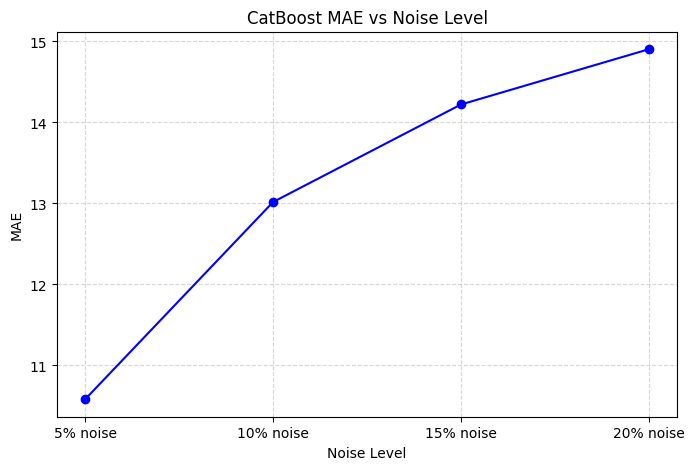

In [67]:
import matplotlib.pyplot as plt

# Filter for CatBoost only
catboost_df = results_df_noise.xs('CatBoost', level='Model')

# Plot R² vs Noise Level
plt.figure(figsize=(8,5))
plt.plot(catboost_df.index, catboost_df['R2'], marker='o', color='red')
plt.xlabel("Noise Level")
plt.ylabel("R² Score")
plt.title("CatBoost Robustness to Noise")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Optional: Plot MAE vs Noise Level
plt.figure(figsize=(8,5))
plt.plot(catboost_df.index, catboost_df['MAE'], marker='o', color='blue')
plt.xlabel("Noise Level")
plt.ylabel("MAE")
plt.title("CatBoost MAE vs Noise Level")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [78]:
results_df_5.loc['CatBoost']['R2']

0.8684582543480359

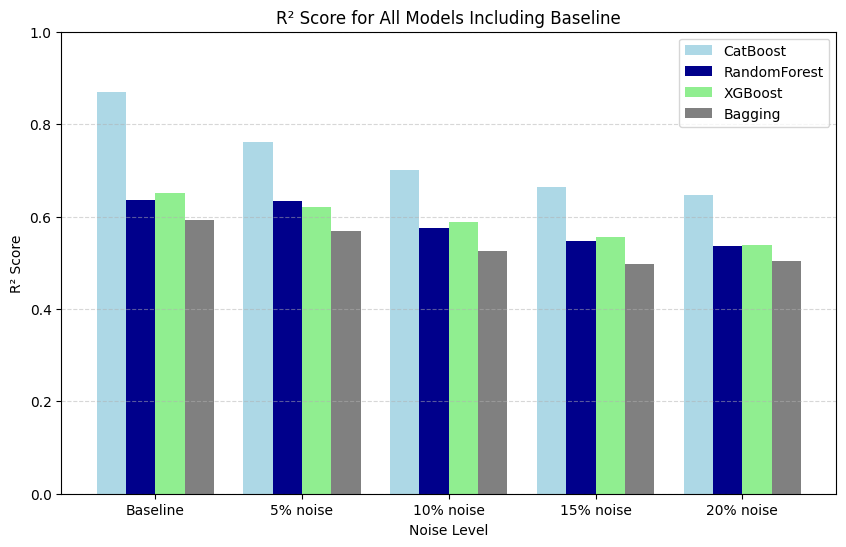

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Noise levels (excluding baseline)
noise_levels = catboost_df.index.tolist()  # e.g., ['5% noise','10% noise','15% noise','20% noise']

# Models
models = ['CatBoost','RandomForest','XGBoost','Bagging']

# Baseline name in results_df_5
baseline_results = results_df_5

# Prepare data: rows = models, cols = baseline + noisy R²
r2_data = []
for model in models:
    # Baseline
    baseline_r2 = baseline_results.loc[model, 'R2']
    
    # Noisy values
    noisy_r2 = results_df_noise.xs(model, level='Model')['R2'].tolist()
    
    # Combine
    r2_data.append([baseline_r2] + noisy_r2)

r2_data = np.array(r2_data)  # shape: (num_models × num_noise_levels+1)

# X-axis positions
x = np.arange(len(noise_levels) + 1)  # +1 for baseline
width = 0.2  # bar width

plt.figure(figsize=(10,6))

# Plot each model
colors = ['lightblue', 'darkblue', 'lightgreen', 'grey']
for i, model in enumerate(models):
    plt.bar(x + i*width, r2_data[i], width, label=model, color=colors[i])

# Center x-ticks under the grouped bars
xticks_labels = ['Baseline'] + noise_levels
plt.xticks(x + width*(len(models)-1)/2, xticks_labels)

plt.ylabel("R² Score")
plt.xlabel("Noise Level")
plt.title("R² Score for All Models Including Baseline")
plt.ylim(0,1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


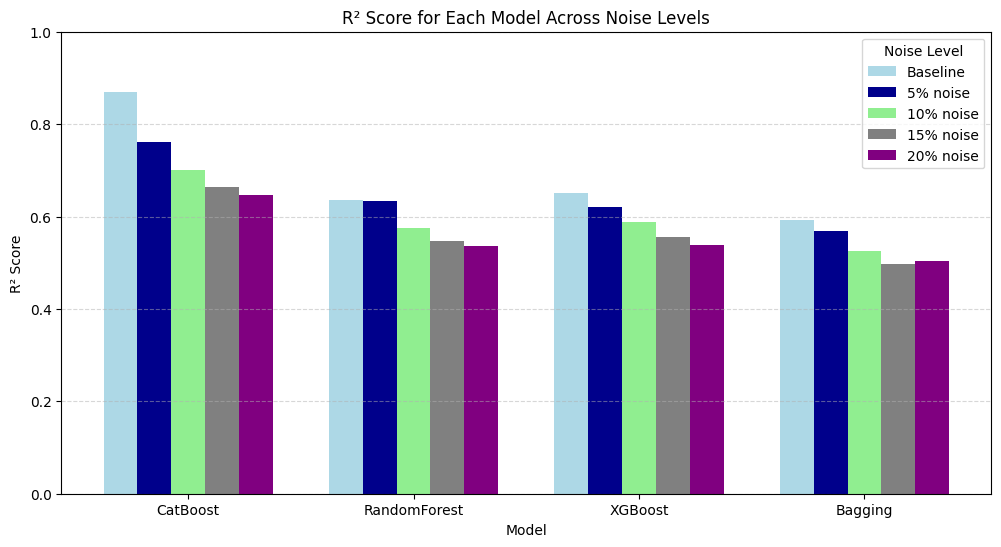

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Noise levels including baseline
noise_labels = ['Baseline'] + catboost_df.index.tolist()  # e.g., ['Baseline','5%','10%','15%','20%']

# Models
models = ['CatBoost','RandomForest','XGBoost','Bagging']

# Prepare data: rows = models, cols = noise levels
r2_data = []
for model in models:
    # Baseline
    baseline_r2 = results_df_5.loc[model, 'R2']
    # Noisy values
    noisy_r2 = results_df_noise.xs(model, level='Model')['R2'].tolist()
    r2_data.append([baseline_r2] + noisy_r2)

r2_data = np.array(r2_data)  # shape: (num_models × num_noise_levels+1)

# X-axis positions
num_bars = r2_data.shape[1]  # number of bars per group (baseline + noise levels)
x = np.arange(len(models))    # position of each group (model)
width = 0.15  # width of each bar

plt.figure(figsize=(12,6))

colors = ['lightblue', 'darkblue', 'lightgreen', 'grey','purple']  # one color per noise level

for i in range(num_bars):
    plt.bar(x + i*width, r2_data[:,i], width, color=colors[i], label=noise_labels[i])

# Center x-ticks under groups
plt.xticks(x + width*(num_bars-1)/2, models)

plt.ylabel("R² Score")
plt.xlabel("Model")
plt.title("R² Score for Each Model Across Noise Levels")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Noise Level")
plt.show()


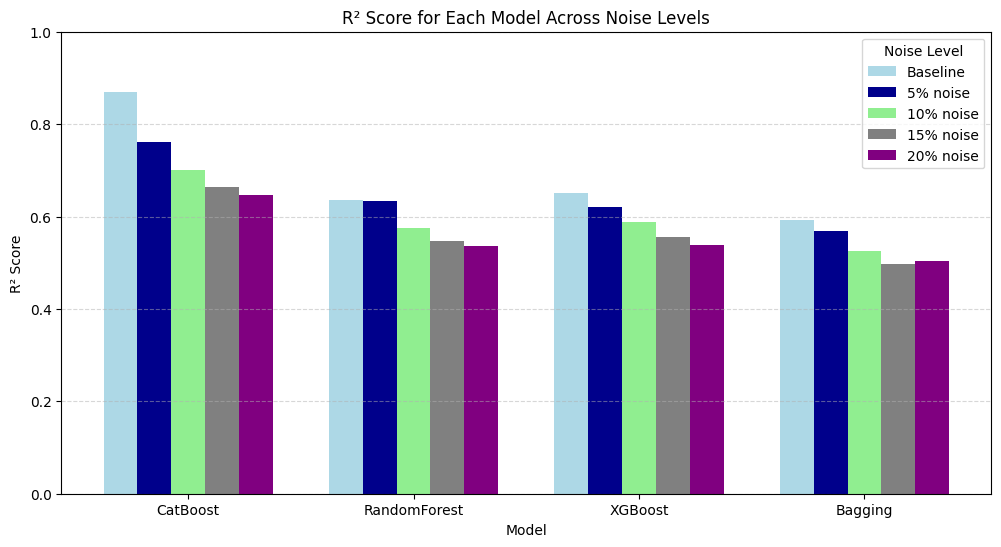

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Noise levels including baseline
noise_labels = ['Baseline'] + catboost_df.index.tolist()  # e.g., ['Baseline','5%','10%','15%','20%']

# Models
models = ['CatBoost','RandomForest','XGBoost','Bagging']

# Prepare data: rows = models, cols = noise levels
r2_data = []
for model in models:
    # Baseline
    baseline_r2 = results_df_5.loc[model, 'R2']
    # Noisy values
    noisy_r2 = results_df_noise.xs(model, level='Model')['R2'].tolist()
    r2_data.append([baseline_r2] + noisy_r2)

r2_data = np.array(r2_data)  # shape: (num_models × num_noise_levels+1)

# X-axis positions
num_bars = r2_data.shape[1]  # number of bars per group (baseline + noise levels)
x = np.arange(len(models))    # position of each group (model)
width = 0.15  # width of each bar

plt.figure(figsize=(12,6))

colors = ['lightblue', 'darkblue', 'lightgreen', 'grey','purple']  # one color per noise level

for i in range(num_bars):
    plt.bar(x + i*width, r2_data[:,i], width, color=colors[i], label=noise_labels[i])

# Center x-ticks under groups
plt.xticks(x + width*(num_bars-1)/2, models)

plt.ylabel("R² Score")
plt.xlabel("Model")
plt.title("R² Score for Each Model Across Noise Levels")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Noise Level")
plt.show()


In [231]:
results_df_5

,MAE,MSE,RMSE,R2,predictions
RandomForest,10.667659,606.100509,24.619109,0.635516,"[1.02, 2.07, 2.94, 4.1, 4.93, 5.91, 7.06, 8.0,..."
Bagging,11.50064,679.35555,26.06445,0.591463,"[1.1, 2.0, 3.0, 4.0, 4.9, 5.9, 7.4, 8.0, 9.4, ..."
XGBoost,10.220612,579.859769,24.080278,0.651296,"[1.4307898, 3.668174, 0.7157538, 1.2488204, 2...."
CatBoost,6.707536,218.740803,14.789889,0.868458,"[1.3282614657310816, 2.7869041037451225, 3.811..."


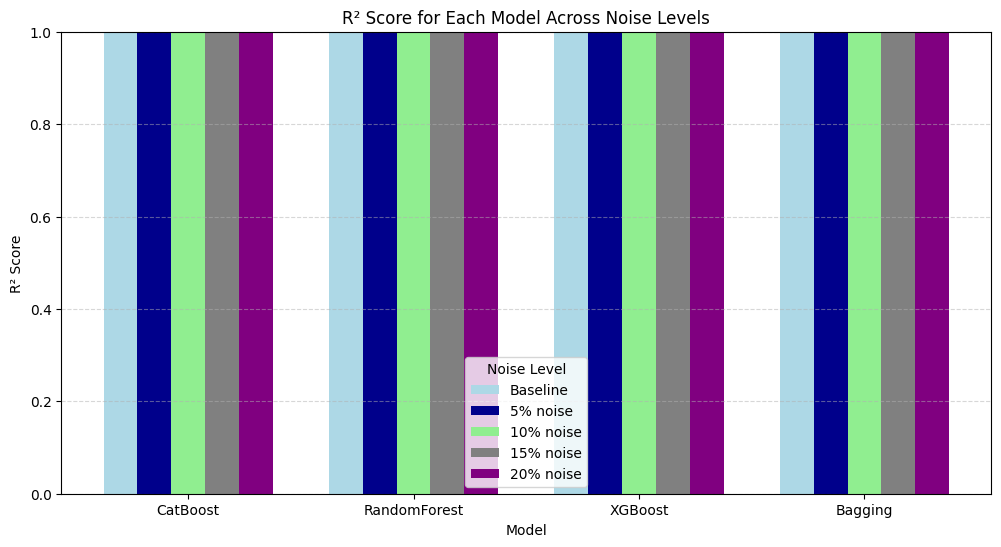

In [232]:
import matplotlib.pyplot as plt
import numpy as np

# Noise levels including baseline
noise_labels = ['Baseline'] + catboost_df.index.tolist()  # e.g., ['Baseline','5%','10%','15%','20%']

# Models
models = ['CatBoost','RandomForest','XGBoost','Bagging']

# Prepare data: rows = models, cols = noise levels
r2_data = []
for model in models:
    # Baseline
    baseline_r2 = results_df_5.loc[model, 'MAE']
    # Noisy values
    noisy_r2 = results_df_noise.xs(model, level='Model')['MAE'].tolist()
    r2_data.append([baseline_r2] + noisy_r2)

r2_data = np.array(r2_data)  # shape: (num_models × num_noise_levels+1)

# X-axis positions
num_bars = r2_data.shape[1]  # number of bars per group (baseline + noise levels)
x = np.arange(len(models))    # position of each group (model)
width = 0.15  # width of each bar

plt.figure(figsize=(12,6))

colors = ['lightblue', 'darkblue', 'lightgreen', 'grey','purple']  # one color per noise level

for i in range(num_bars):
    plt.bar(x + i*width, r2_data[:,i], width, color=colors[i], label=noise_labels[i])

# Center x-ticks under groups
plt.xticks(x + width*(num_bars-1)/2, models)

plt.ylabel("R² Score")
plt.xlabel("Model")
plt.title("R² Score for Each Model Across Noise Levels")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Noise Level")
plt.show()


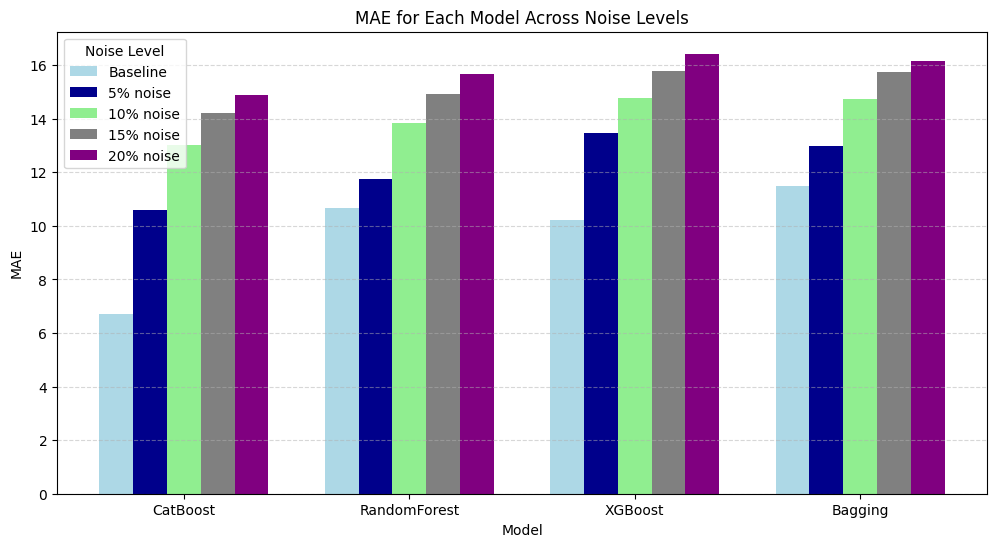

In [233]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['CatBoost','RandomForest','XGBoost','Bagging']

# Get noise levels (baseline + noisy)
noise_labels = ['Baseline'] + results_df_noise.index.get_level_values('Noise_Level').unique().tolist()

# Collect MAE data
mae_data = []
for model in models:
    baseline_mae = results_df_5.loc[model, 'MAE']  # baseline MAE
    noisy_mae = results_df_noise.xs(model, level='Model')['MAE'].tolist()
    mae_data.append([baseline_mae] + noisy_mae)

mae_data = np.array(mae_data)  # shape: (num_models × num_noise_levels+1)
num_bars = mae_data.shape[1]
x = np.arange(len(models))
width = 0.15  # width of each bar

# Plot
plt.figure(figsize=(12,6))
colors = ['lightblue', 'darkblue', 'lightgreen', 'grey', 'purple']  # one color per noise level

for i in range(num_bars):
    plt.bar(x + i*width, mae_data[:,i], width, color=colors[i], label=noise_labels[i])

# Center x-ticks under groups
plt.xticks(x + width*(num_bars-1)/2, models)
plt.ylabel("MAE")
plt.xlabel("Model")
plt.title("MAE for Each Model Across Noise Levels")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Noise Level")
plt.show()


In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Your noise levels (excluding baseline)
noise_levels = ['5% noise','10% noise','15% noise','20% noise']

# Your models
models = ['CatBoost','RandomForest','XGBoost','Bagging']

# Custom name in your clean DataFrame for no-noise baseline
baseline_name = 'predictions_24_cb'  # e.g., the row/column name in results_df_24

# Prepare R² data
r2_data = []

for model in models:
    model_r2 = []
    # First, baseline (custom name)
    if model == 'CatBoost':
        r2 = results_df_5.loc[model, 'R2']  # lookup by your custom name
    else:
        r2 = results_df_noise.loc[model, 'R2']  # other models baseline
    model_r2.append(r2)
    
    # Then noisy results
    for noise in noise_levels:
        r2 = results_df_noise.loc[(noise, model), 'R2']
        model_r2.append(r2)
    
    r2_data.append(model_r2)

r2_data = np.array(r2_data)

# X-axis positions: one group per noise level including baseline
x = np.arange(len(noise_levels)+1)  # +1 for baseline
width = 0.2

plt.figure(figsize=(10,6))
for i, model in enumerate(models):
    plt.bar(x + i*width, r2_data[i], width, label=model)

# X-ticks labels
xticks_labels = ['Baseline'] + noise_levels
plt.xticks(x + width*(len(models)-1)/2, xticks_labels)
plt.ylabel("R² Score")
plt.xlabel("Noise Level")
plt.title("R² Score for Models including Baseline")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


KeyError: 'RandomForest'

In [ ]:
import SHAP as 

X100 = train_5_x.sample(100)
explainer_xgb = shap.Explainer(model5_5, X100)
shap_values_xgb = explainer_xgb(test_5_x)

# make a standard partial dependence plot with a single SHAP value overlaid
sample_ind = 0  
fig, ax = shap.partial_dependence_plot(
    "DI",
    model5_5.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

In [ ]:
shap.plots.beeswarm(shap_values_xgb)

In [ ]:
shap.plots.bar(shap_values_xgb)

In [ ]:
shap.partial_dependence_plot(
    "machineID",
    model5_5.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [ ]:
shap.partial_dependence_plot(
    "DI",
    model5_5.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [ ]:
shap.plots.scatter(shap_values_xgb[:, "machineID"],color=shap_values_xgb)

In [38]:
import numpy as np
import pandas as pd

# Example: train dataframe has columns: machineID, time_in_cycles, sensors..., RUL
feature_cols = ['voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d',
                'voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d']

window_size = 10  # sequence length (can tune)
machines = train['machineID'].unique()

X_train, y_train = [], []

for m in machines:
    machine_data = train[train['machineID'] == m].sort_values('time_in_cycles')
    features = machine_data[feature_cols].values
    rul = machine_data['RUL_I'].values  # inverse RUL or actual RUL
    for i in range(len(features) - window_size + 1):
        X_train.append(features[i:i+window_size])
        y_train.append(rul[i+window_size-1])  # predict RUL at last timestep

X_train = np.array(X_train)  # shape: (num_sequences, window_size, num_features)
y_train = np.array(y_train)
print(X_train.shape, y_train.shape)


(19985, 10, 8) (19985,)


In [40]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd


In [41]:
class RULDataset(Dataset):
    def __init__(self, df, feature_cols, target_col='RUL_I', window_size=10):
        self.X = []
        self.y = []
        self.window_size = window_size
        machines = df['machineID'].unique()
        for m in machines:
            machine_data = df[df['machineID'] == m].sort_values('time_in_cycles')
            features = machine_data[feature_cols].values
            target = machine_data[target_col].values
            for i in range(len(features) - window_size + 1):
                self.X.append(features[i:i+window_size])
                self.y.append(target[i+window_size-1])
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32).view(-1,1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Example usage:
feature_cols = ['voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d',
                'voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d']
window_size = 10

train_dataset = RULDataset(train, feature_cols, window_size=window_size)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = RULDataset(test, feature_cols, window_size=window_size)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


C:\Users\ismai\AppData\Local\Temp\ipykernel_43928\454241231.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  self.X = torch.tensor(self.X, dtype=torch.float32)


In [42]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32,1)
    
    def forward(self, x):
        # x: [batch_size, seq_len, input_size]
        out, (h_n, c_n) = self.lstm(x)
        out = out[:,-1,:]  # take last timestep
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = LSTMRegressor(input_size=len(feature_cols))


In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/50, Loss: 2273.6105
Epoch 2/50, Loss: 1590.3069
Epoch 3/50, Loss: 1589.2526
Epoch 4/50, Loss: 1589.4114
Epoch 5/50, Loss: 1589.0015
Epoch 6/50, Loss: 1589.4088
Epoch 7/50, Loss: 1589.4397
Epoch 8/50, Loss: 1589.2920
Epoch 9/50, Loss: 1589.2709
Epoch 10/50, Loss: 1589.9094
Epoch 11/50, Loss: 1589.3546
Epoch 12/50, Loss: 1589.4919
Epoch 13/50, Loss: 1589.3647
Epoch 14/50, Loss: 1588.9828
Epoch 15/50, Loss: 1589.6665
Epoch 16/50, Loss: 1589.2924
Epoch 17/50, Loss: 1589.2282
Epoch 18/50, Loss: 1589.1660
Epoch 19/50, Loss: 1589.9033
Epoch 20/50, Loss: 1589.6166
Epoch 21/50, Loss: 1589.4513
Epoch 22/50, Loss: 1589.4217
Epoch 23/50, Loss: 1589.5308
Epoch 24/50, Loss: 1589.4572
Epoch 25/50, Loss: 1589.6939
Epoch 26/50, Loss: 1589.3764
Epoch 27/50, Loss: 1589.5203
Epoch 28/50, Loss: 1589.5267
Epoch 29/50, Loss: 1589.4163
Epoch 30/50, Loss: 1589.2339
Epoch 31/50, Loss: 1589.1522
Epoch 32/50, Loss: 1589.6434
Epoch 33/50, Loss: 1589.3098
Epoch 34/50, Loss: 1589.1504
Epoch 35/50, Loss: 1589

In [44]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        y_true.append(y_batch.numpy())
        y_pred.append(outputs.cpu().numpy())

y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("Test MAE:", mae)
print("Test R²:", r2)


Test MAE: 30.27260398864746
Test R²: -0.0009760856628417969


In [52]:
# =======================
# 1. Imports
# =======================
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# =======================
# 2. Parameters
# =======================
feature_cols = ['voltmean_5d', 'rotatemean_5d',
       'pressuremean_5d', 'vibrationmean_5d', 'voltsd_5d', 'rotatesd_5d',
       'pressuresd_5d', 'vibrationsd_5d', 'error1', 'error2', 'error3',
       'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4', 'age', 'DI']
target_col = 'RUL_I'
window_size = 10
batch_size = 64
epochs = 10
learning_rate = 0.001
scale_target = True  # scale RUL_I to 0-1

# =======================
# 3. Feature Scaling
# =======================
scalers = {}
for col in feature_cols:
    scaler = StandardScaler()
    train[col] = scaler.fit_transform(train[[col]])
    test[col] = scaler.transform(test[[col]])
    scalers[col] = scaler

# Target scaling
if scale_target:
    rul_max = train[target_col].max()
    train['RUL_scaled'] = train[target_col] / rul_max
    test['RUL_scaled'] = test[target_col] / rul_max
    y_col = 'RUL_scaled'
else:
    y_col = target_col

# =======================
# 4. Dataset class
# =======================
class RULDataset(Dataset):
    def __init__(self, df, feature_cols, target_col, window_size):
        self.X = []
        self.y = []
        machines = df['machineID'].unique()
        for m in machines:
            machine_data = df[df['machineID']==m].sort_values('time_in_cycles')
            features = machine_data[feature_cols].values
            target = machine_data[target_col].values
            for i in range(len(features)-window_size+1):
                self.X.append(features[i:i+window_size])
                self.y.append(target[i+window_size-1])
        self.X = torch.tensor(np.array(self.X), dtype=torch.float32)
        self.y = torch.tensor(np.array(self.y), dtype=torch.float32).view(-1,1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = RULDataset(train, feature_cols, y_col, window_size)
test_dataset  = RULDataset(test, feature_cols, y_col, window_size)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# =======================
# 5. LSTM Model
# =======================
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32,1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:,-1,:]  # take last timestep
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMRegressor(input_size=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# =======================
# 6. Training loop
# =======================
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# =======================
# 7. Evaluate & Predict
# =======================
model.eval()
y_true, y_pred, seq_indices = [], [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        y_pred.append(outputs)
        y_true.append(y_batch.numpy())

y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

# Rescale target if scaled
if scale_target:
    y_true *= rul_max
    y_pred *= rul_max

mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)
print("Test MAE:", mae)
print("Test R²:", r2)

# =======================
# 8. Add predictions to test dataframe
# =======================
# Note: assign per machine for inverse transform
test_pred_list = []

for m in test['machineID'].unique():
    machine_mask = test['machineID']==m
    machine_data = test[machine_mask].sort_values('time_in_cycles')
    n = len(machine_data) - window_size + 1
    preds = y_pred[:n].flatten()
    test_pred_list.append(preds)
    y_pred = y_pred[n:]  # remove used predictions

# Flatten predictions
test['RUL_pred_LSTM'] = np.nan
for m, preds in zip(test['machineID'].unique(), test_pred_list):
    mask = test['machineID']==m
    test.loc[mask, 'RUL_pred_LSTM'].iloc[window_size-1:] = preds  # first window_size-1 are NaN

# =======================
# 9. Optional: Linear inverse (if you want RUL from RUL_I)
# =======================
max_rul_per_machine = train.groupby('machineID')['RUL_I'].max().to_dict()
test['RUL_from_RUL_I_pred'] = test.apply(lambda row: max_rul_per_machine[row['machineID']] - row['RUL_pred_LSTM'], axis=1)


Epoch 1/10, Loss: 0.0184
Epoch 2/10, Loss: 0.0152
Epoch 3/10, Loss: 0.0130
Epoch 4/10, Loss: 0.0117
Epoch 5/10, Loss: 0.0105
Epoch 6/10, Loss: 0.0096
Epoch 7/10, Loss: 0.0085
Epoch 8/10, Loss: 0.0078
Epoch 9/10, Loss: 0.0070
Epoch 10/10, Loss: 0.0064
Test MAE: 30.05002784729004
Test R²: -0.25731217861175537


C:\Users\ismai\AppData\Local\Temp\ipykernel_43928\2036670419.py:159: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test.loc[mask, 'RUL_pred_LSTM'].iloc[window_size-1:] = preds  # first window_size-1 are NaN


In [ ]:
Epoch 50/50, Loss: 0.0028
Test MAE: 35.44496154785156
Test R²: -0.5174908638000488

In [49]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# =======================
# 1. Prepare features and target
# =======================
feature_cols = ['voltmean_5d','rotatemean_5d','pressuremean_5d','vibrationmean_5d',
                'voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d']

X_train = train_5_x
y_train = train_5_y  # can also use RUL_I if you want inverse RUL

X_test = test_5_x
y_test = test_5_y

# =======================
# 2. Feature scaling
# =======================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =======================
# 3. Train BayesianRidge
# =======================
model = BayesianRidge(max_iter=300, alpha_1=1e-6, lambda_1=1e-6, compute_score=True)
model.fit(X_train, y_train)

# =======================
# 4. Predict & evaluate
# =======================
y_pred, y_std = model.predict(X_test, return_std=True)  # y_std = uncertainty estimate

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)

# =======================
# 5. Add predictions and uncertainty to dataframe
# =======================
test['RUL_pred_Bayes'] = y_pred
test['RUL_pred_std']   = y_std


MAE: 17.495545623825304
R²: 0.6153943340126533


In [53]:
test.columns

Index(['machineID', 'datetime', 'time_in_cycles', 'voltmean_24h',
       'rotatemean_24h', 'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h',
       'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h', 'voltmean_5d',
       'rotatemean_5d', 'pressuremean_5d', 'vibrationmean_5d', 'voltsd_5d',
       'rotatesd_5d', 'pressuresd_5d', 'vibrationsd_5d', 'error1', 'error2',
       'error3', 'error4', 'error5', 'comp1', 'comp2', 'comp3', 'comp4',
       'model', 'age', 'DI', 'RULWeek', 'failure', 'failed', 'RUL', 'RUL_I',
       'predictions_24_rf', 'predictions_24_bgg', 'predictions_24_xgb',
       'predictions_24_cb', 'predictions_5_rf', 'predictions_5_bgg',
       'predictions_5_xgb', 'predictions_5_cb', 'RUL_scaled', 'RUL_pred_LSTM',
       'RUL_from_RUL_I_pred', 'RUL_pred_Bayes', 'RUL_pred_std'],
      dtype='object')

In [54]:
# Suppose you have test dataframe with:
# 'RUL' : actual remaining useful life
# 'RUL_pred_CatBoost' : predicted RUL from your model

# Define alarm threshold (cycles)
alarm_threshold = 10  

# Alarm is triggered if predicted RUL <= threshold
test['alarm'] = (test['predictions_24_cb'] <= alarm_threshold).astype(int)

# Raw alarm rate
alarm_rate = test['alarm'].sum() / len(test)
print("Alarm rate:", alarm_rate)

# Optional: False alarm rate
# False alarm = alarm triggered but actual RUL > threshold
false_alarms = test[(test['alarm']==1) & (test['RUL'] > alarm_threshold)]
false_alarm_rate = len(false_alarms) / len(test)
print("False alarm rate:", false_alarm_rate)

# Optional: Detection rate / recall
# Detection = alarm triggered when actual RUL <= threshold
detections = test[(test['alarm']==1) & (test['RUL'] <= alarm_threshold)]
detection_rate = len(detections) / len(test[test['RUL'] <= alarm_threshold])
print("Detection rate:", detection_rate)


Alarm rate: 0.15106412574767006
False alarm rate: 0.004033940742801502
Detection rate: 0.888235294117647


In [ ]:
number = 26
actual_RUL = test[test['machineID'] == number]['RUL']   # Distribution 1
prediction_RUL = test[test['machineID'] == number]['predictions_24_cb'] # Distribution 2
import seaborn as sns

sns.kdeplot(actual_RUL, color='blue', label='Actual RUL', fill=False, clip=(0, None))
sns.kdeplot(prediction_RUL, color='red', label='Predicted RUL', fill=False, clip=(0, None))


plt.xlabel('Value')
plt.ylabel('Density')
plt.title('CatBoost')
plt.legend()
plt.show()


In [94]:
results_df_noise

MAE         MSE       RMSE        R2  \
Noise_Level Model                                                      
5% noise    RandomForest  11.757399  610.811014  24.714591  0.632683   
            Bagging       12.965753  717.124457   26.77918  0.568751   
            XGBoost       13.461705  632.207611  25.143739  0.619816   
            CatBoost      10.582509  398.501926  19.962513  0.760357   
10% noise   RandomForest  13.851427  705.903007  26.568835  0.575499   
            Bagging       14.723494  788.168418  28.074337  0.526028   
            XGBoost       14.781642  683.595528   26.14566  0.588914   
            CatBoost      13.017714  497.122561  22.296245  0.701051   
15% noise   RandomForest  14.923799  752.844874  27.438019   0.54727   
            Bagging       15.734108  835.440202  28.903982  0.497601   
            XGBoost       15.796375  739.188771  27.188026  0.555482   
            CatBoost      14.221813  559.065683   23.64457  0.663801   
20% noise   RandomForest  15.668455  769.497014  27.739809  0.537256   
            Bagging       16.161038   824.05143  28.706296  0.504449   
            XGBoost       16.426628  766.726605  27.689829  0.538922   
            CatBoost      14.904236  587.423791  24.236827  0.646747   

                                                                predictions  
Noise_Level Model                                                            
5% noise    RandomForest  [1.02, 1.03, 2.19, 2.1, 4.95, 4.53, 7.05, 7.91...  
            Bagging       [1.0, 1.0, 2.1, 1.9, 4.8, 4.4, 7.3, 7.7, 9.3, ...  
            XGBoost       [3.8074152, 0.07422199, 3.2209573, 2.6889935, ...  
            CatBoost      [1.3427682897944067, -1.3821861355414455, 2.82...  
10% noise   RandomForest  [1.02, 2.8, 4.5, 2.85, 4.36, 6.18, 5.74, 7.71,...  
            Bagging       [1.0, 2.9, 4.6, 3.1, 4.3, 7.0, 5.3, 7.7, 9.3, ...  
            XGBoost       [2.031934, 3.741598, 5.053411, 4.2685146, 2.43...  
            CatBoost      [1.7957980470902015, 2.8870315653802834, 4.464...  
15% noise   RandomForest  [1.04, 2.13, 2.17, 1.49, 7.43, 2.73, 7.44, 10....  
            Bagging       [1.0, 1.9, 2.1, 1.3, 7.4, 2.7, 7.2, 10.3, 6.8,...  
            XGBoost       [3.0861416, 2.9064138, -0.13131154, 2.4280555,...  
            CatBoost      [-4.624749642113585, 2.9001706838900674, 1.217...  
20% noise   RandomForest  [3.19, 1.32, 2.69, 1.05, 4.56, 2.25, 6.37, 6.6...  
            Bagging       [3.3, 1.3, 3.0, 1.0, 4.6, 2.2, 6.4, 6.6, 7.2, ...  
            XGBoost       [5.651987, -0.026964083, 5.3277984, -0.1496120...  
            CatBoost      [1.1281609747178933, -1.6015210328186953, 0.46...

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for one machine
machine_id = 1

# True RUL
actual_RUL = test[test['machineID'] == machine_id]['RUL']

# Baseline predictions
baseline_pred = test[test['machineID'] == machine_id]['predictions_24_cb']

# Noisy predictions (e.g., 5%, 10%, 15% noise)
noisy_pred_5 = results_df_noise['5% noise'].xs('CatBoost', level='Model')['predictions'].iloc[0]  # example
noisy_pred_10 = results_df_noise['10% noise'].xs('CatBoost', level='Model')['predictions'].iloc[0]  # etc.

plt.figure(figsize=(8,6))
sns.kdeplot(actual_RUL, color='black', label='True RUL')
sns.kdeplot(baseline_pred, color='blue', label='Baseline Prediction')
sns.kdeplot(noisy_pred_5, color='red', label='5% Noise Prediction')
sns.kdeplot(noisy_pred_10, color='orange', label='10% Noise Prediction')
plt.xlabel("RUL")
plt.ylabel("Density")
plt.title(f"KDE of Predicted vs True RUL for Machine {machine_id}")
plt.legend()
plt.show()


KeyError: '5% noise'

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

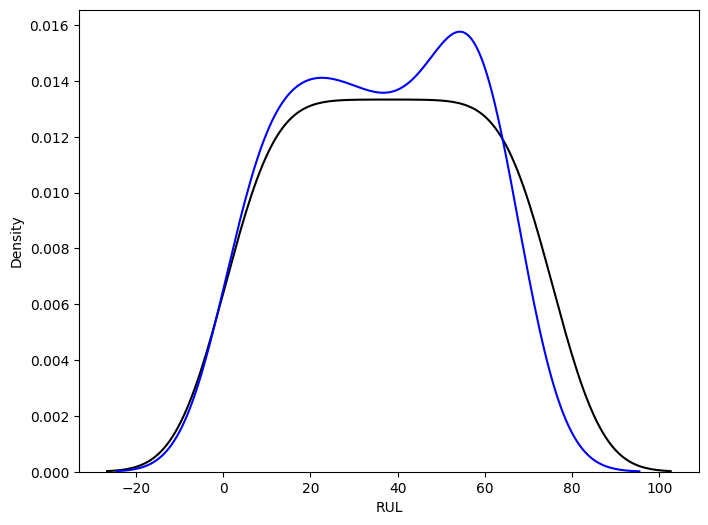

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

machine_id = 1
model_name = 'CatBoost'

# True RUL
actual_RUL = test[test['machineID'] == machine_id]['RUL']

# Baseline predictions (no noise)
baseline_pred = test[test['machineID'] == machine_id]['predictions_24_cb']

plt.figure(figsize=(8,6))
sns.kdeplot(actual_RUL, color='black', label='True RUL')
sns.kdeplot(baseline_pred, color='blue', label='Baseline Prediction')

# Loop through all noise levels in results_df_noise
noise_levels = results_df_noise.index.get_level_values('Noise_Level').unique()
for noise in noise_levels:
    # Get predictions for this machine and model at this noise level
    noisy_pred = results_df_noise.xs((noise, model_name)).predictions.iloc[0]  # first row if multiple
    sns.kdeplot(noisy_pred, label=f"{noise} Noise")

plt.xlabel("RUL")
plt.ylabel("Density")
plt.title(f"KDE of Predicted vs True RUL for Machine {machine_id} ({model_name})")
plt.legend()
plt.show()


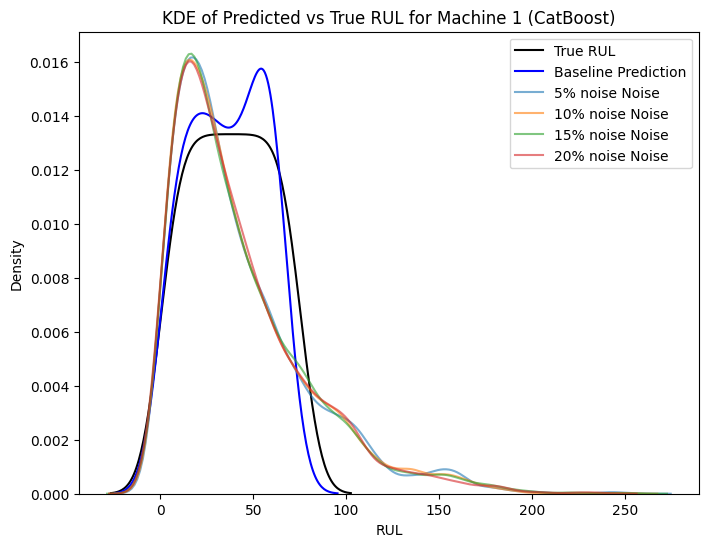

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

machine_id = 1
model_name = 'CatBoost'

# True RUL
actual_RUL = test[test['machineID'] == machine_id]['RUL']

# Baseline predictions (no noise)
baseline_pred = test[test['machineID'] == machine_id]['predictions_24_cb']

plt.figure(figsize=(8,6))
sns.kdeplot(actual_RUL, color='black', label='True RUL')
sns.kdeplot(baseline_pred, color='blue', label='Baseline Prediction')

# Loop through all noise levels
noise_levels = results_df_noise.index.get_level_values('Noise_Level').unique()

for noise in noise_levels:
    # Access predictions array directly
    noisy_pred = results_df_noise.xs((noise, model_name)).predictions  # this is a np.ndarray
    # If it's 2D or list of arrays, flatten it
    if isinstance(noisy_pred, np.ndarray):
        noisy_pred = noisy_pred.flatten()
    sns.kdeplot(noisy_pred, label=f"{noise} Noise", alpha=0.6)  # alpha for transparency

plt.xlabel("RUL")
plt.ylabel("Density")
plt.title(f"KDE of Predicted vs True RUL for Machine {machine_id} ({model_name})")
plt.legend()
plt.show()


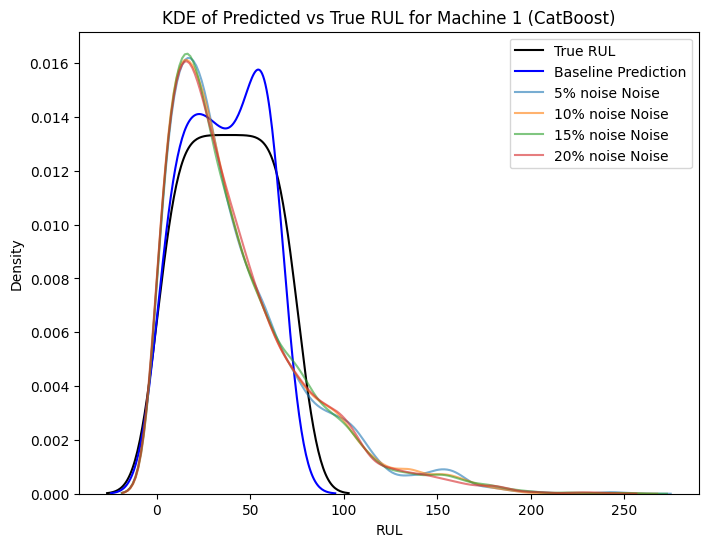

In [97]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

machine_id = 1
model_name = 'CatBoost'

# True RUL
actual_RUL = test[test['machineID'] == machine_id]['RUL']

# Baseline predictions (no noise), clipped at 0
baseline_pred = np.clip(test[test['machineID'] == machine_id]['predictions_24_cb'], 0, None)

plt.figure(figsize=(8,6))
sns.kdeplot(actual_RUL, color='black', label='True RUL')
sns.kdeplot(baseline_pred, color='blue', label='Baseline Prediction')

# Loop through all noise levels
noise_levels = results_df_noise.index.get_level_values('Noise_Level').unique()

for noise in noise_levels:
    noisy_pred = results_df_noise.xs((noise, model_name)).predictions
    if isinstance(noisy_pred, np.ndarray):
        noisy_pred = noisy_pred.flatten()
    # Clip predictions at 0
    noisy_pred = np.clip(noisy_pred, 0, None)
    sns.kdeplot(noisy_pred, label=f"{noise} Noise", alpha=0.6)

plt.xlabel("RUL")
plt.ylabel("Density")
plt.title(f"KDE of Predicted vs True RUL for Machine {machine_id} ({model_name})")
plt.legend()
plt.show()


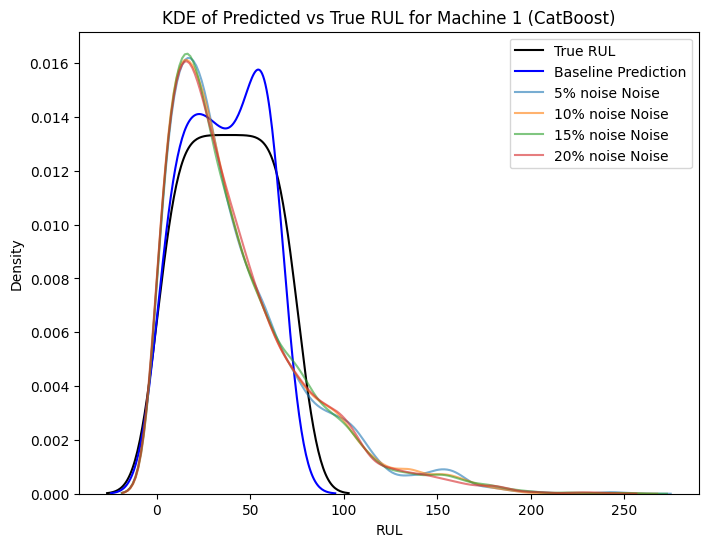

In [98]:
import numpy as np

machine_id = 1
model_name = 'CatBoost'

# True RUL
actual_RUL = test[test['machineID'] == machine_id]['RUL']

# Baseline predictions (no noise), make sure it's a flat numpy array
baseline_pred = np.array(test[test['machineID'] == machine_id]['predictions_24_cb']).flatten()
baseline_pred = np.clip(baseline_pred, 0, None)  # clip all values at 0

plt.figure(figsize=(8,6))
sns.kdeplot(actual_RUL, color='black', label='True RUL')
sns.kdeplot(baseline_pred, color='blue', label='Baseline Prediction')

# Loop through all noise levels
noise_levels = results_df_noise.index.get_level_values('Noise_Level').unique()

for noise in noise_levels:
    noisy_pred = results_df_noise.xs((noise, model_name)).predictions
    # flatten if nested
    if isinstance(noisy_pred, np.ndarray):
        noisy_pred = np.array(noisy_pred).flatten()
    noisy_pred = np.clip(noisy_pred, 0, None)  # clip all at 0
    sns.kdeplot(noisy_pred, label=f"{noise} Noise", alpha=0.6)

plt.xlabel("RUL")
plt.ylabel("Density")
plt.title(f"KDE of Predicted vs True RUL for Machine {machine_id} ({model_name})")
plt.legend()
plt.show()


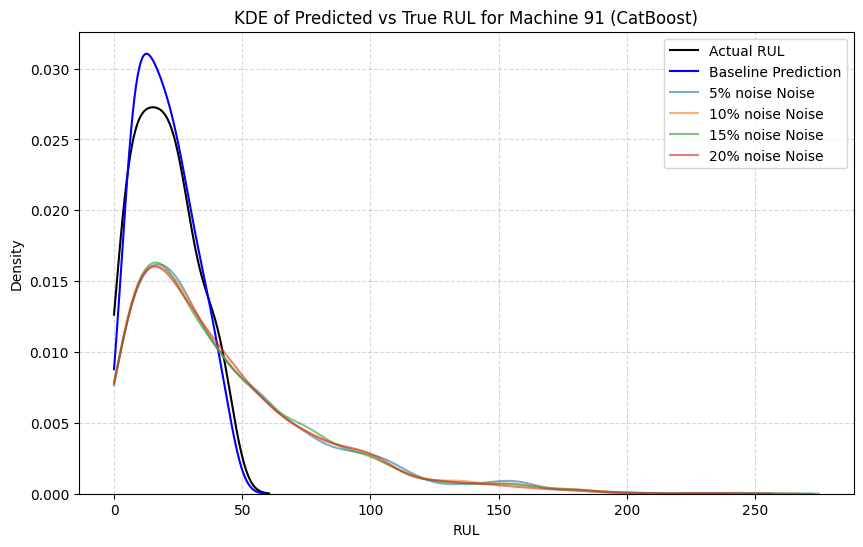

In [177]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ----- SETTINGS ----
machine_id = 91
model_name = 'CatBoost'

# ----- GET TRUE RUL -----
actual_RUL = test[test['machineID'] == machine_id]['RUL']

# ----- BASELINE PREDICTIONS (NO NOISE) -----
baseline_pred = np.array(test[test['machineID'] == machine_id]['predictions_24_cb']).flatten()

# ----- PLOT INITIALIZATION -----
plt.figure(figsize=(10,6))

# Actual RUL
sns.kdeplot(actual_RUL, color='black', label='Actual RUL', fill=False, clip=(0, None))

# Baseline prediction
sns.kdeplot(baseline_pred, color='blue', label='Baseline Prediction', fill=False, clip=(0, None))

# ----- LOOP THROUGH NOISE LEVELS -----
noise_levels = results_df_noise.index.get_level_values('Noise_Level').unique()

for noise in noise_levels:
    # Access predictions for this model and noise level
    noisy_pred = results_df_noise.xs((noise, model_name)).predictions
    # Flatten in case it's nested
    if isinstance(noisy_pred, np.ndarray):
        noisy_pred = np.array(noisy_pred).flatten()
    # KDE plot with clipping and transparency
    sns.kdeplot(noisy_pred, label=f"{noise} Noise", alpha=0.6, fill=False, clip=(0, None))

# ----- FINALIZE PLOT -----
plt.xlabel("RUL")
plt.ylabel("Density")
plt.title(f"KDE of Predicted vs True RUL for Machine {machine_id} ({model_name})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


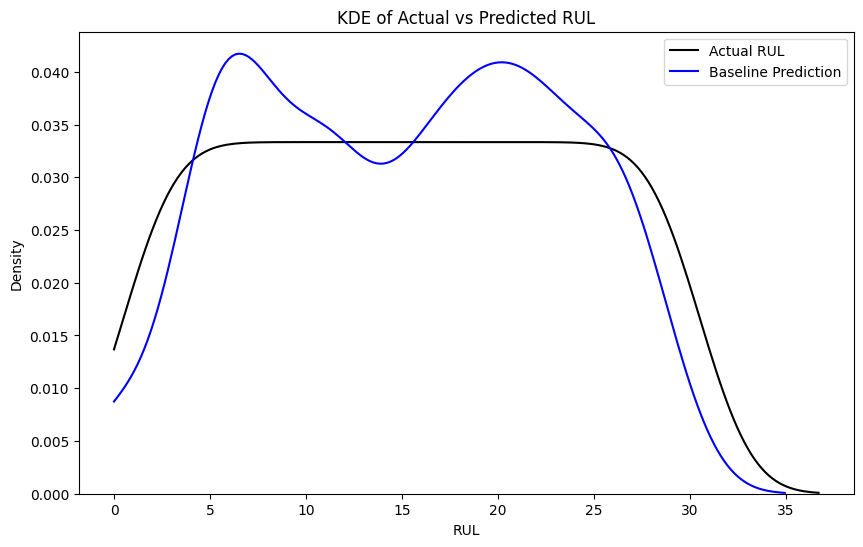

In [189]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Flattened example
baseline_pred = np.clip(np.array(test[test['machineID'] == machine_id]['predictions_24_cb']).flatten(), 0, None)
actual_RUL = np.array(test[test['machineID'] == machine_id]['RUL']).flatten()

plt.figure(figsize=(10,6))
sns.kdeplot(actual_RUL, color='black', label='Actual RUL', fill=False, clip=(0, None), bw_adjust=0.5)
sns.kdeplot(baseline_pred, color='blue', label='Baseline Prediction', fill=False, clip=(0, None), bw_adjust=0.5)
plt.xlabel("RUL")
plt.ylabel("Density")  # still density
plt.title("KDE of Actual vs Predicted RUL")
plt.legend()
plt.show()


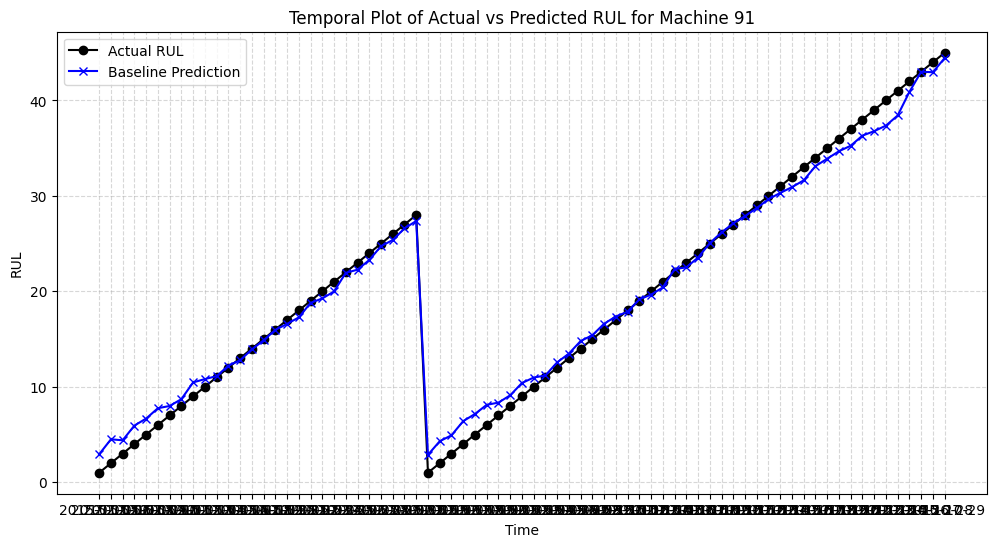

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# ----- SETTINGS -----
machine_id = 91  # choose your machine
time_col = 'datetime'  # replace with your actual datetime column name
baseline_col = 'predictions_24_cb'

# Filter and sort by time
machine_data = test[test['machineID'] == machine_id].sort_values(time_col)

# Clip predictions at 0 to avoid negative RUL
baseline_pred = np.clip(machine_data[baseline_col].values, 0, None)
actual_RUL = machine_data['RUL'].values
time_values = machine_data[time_col]

# ----- PLOT -----
plt.figure(figsize=(12,6))

# Actual RUL
plt.plot(time_values, actual_RUL, color='black', label='Actual RUL', marker='o')

# Baseline prediction
plt.plot(time_values, baseline_pred, color='blue', label='Baseline Prediction', marker='x')

plt.xlabel("Time")
plt.ylabel("RUL")
plt.title(f"Temporal Plot of Actual vs Predicted RUL for Machine {machine_id}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


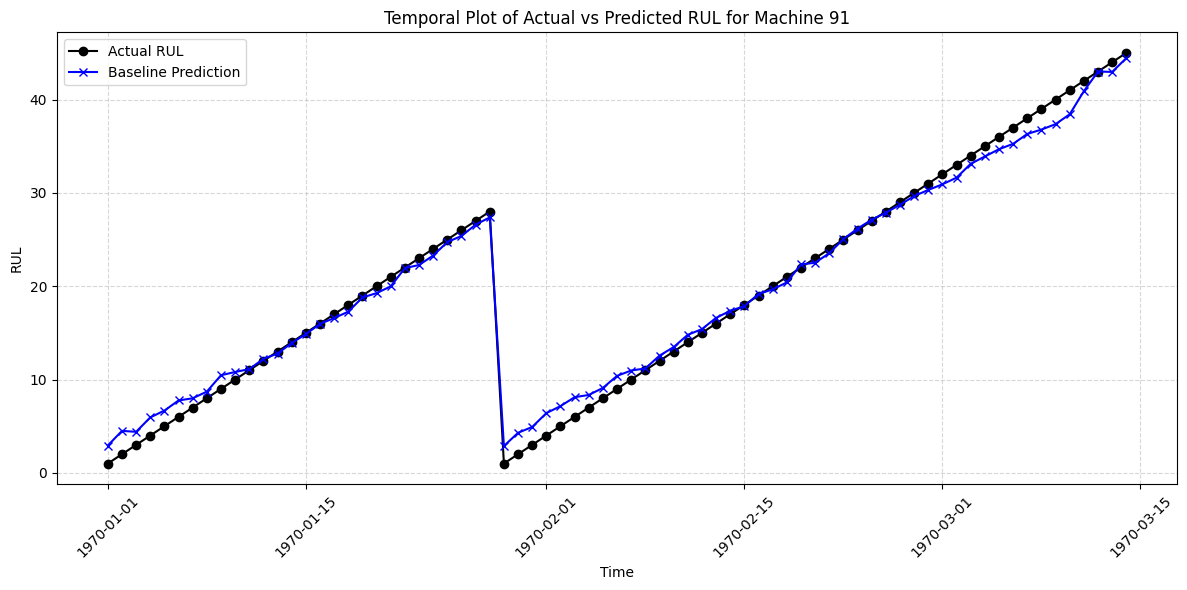

In [205]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

machine_id = 91
time_col = 'datetime'   # your datetime column
baseline_col = 'predictions_24_cb'

# Filter and sort by time
machine_data = test[test['machineID'] == machine_id].sort_values(time_col)
baseline_pred = np.clip(machine_data[baseline_col].values, 0, None)
actual_RUL = machine_data['RUL'].values
time_values = machine_data[time_col]

plt.figure(figsize=(12,6))

# Plot lines
plt.plot(time_values, actual_RUL, color='black', label='Actual RUL', marker='o')
plt.plot(time_values, baseline_pred, color='blue', label='Baseline Prediction', marker='x')

# Format X-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # automatically spaced ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # show only date
plt.xticks(rotation=45)  # rotate for readability

plt.xlabel("Time")
plt.ylabel("RUL")
plt.title(f"Temporal Plot of Actual vs Predicted RUL for Machine {machine_id}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # prevents clipping
plt.show()


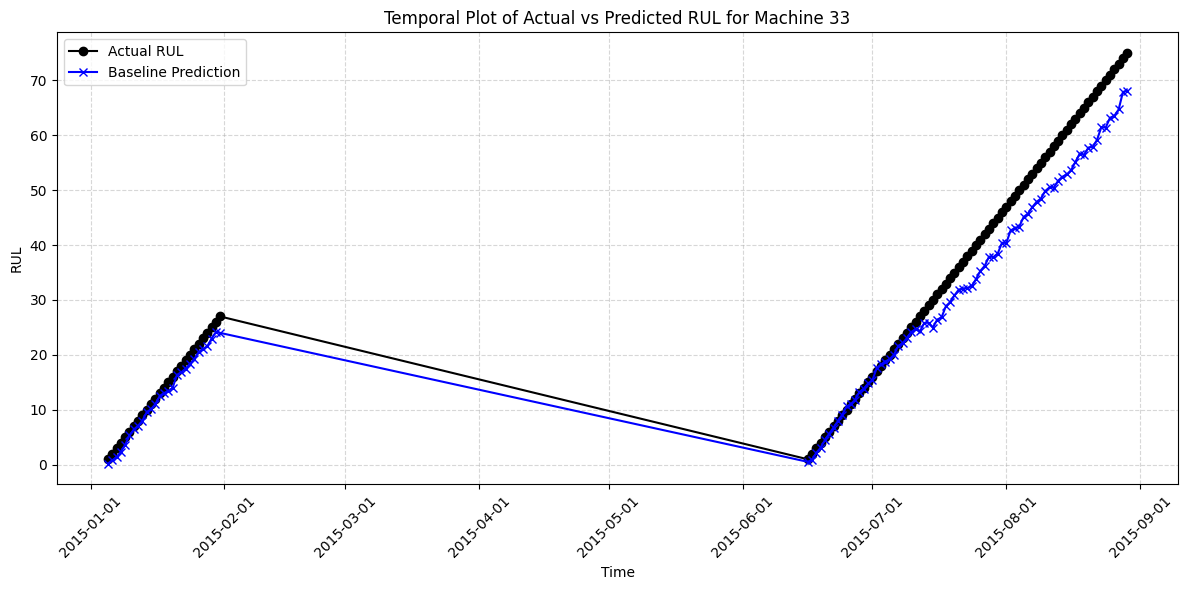

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

machine_id = 33
time_col = 'datetime'
baseline_col = 'predictions_24_cb'

# Ensure datetime type
test[time_col] = pd.to_datetime(test[time_col])

# Filter machine and sort
machine_data = test[test['machineID'] == machine_id].sort_values(time_col)

baseline_pred = np.clip(machine_data[baseline_col].values, 0, None)
actual_RUL = machine_data['RUL'].values
time_values = machine_data[time_col]

# Plot
plt.figure(figsize=(12,6))
plt.plot(time_values, actual_RUL, color='black', label='Actual RUL', marker='o')
plt.plot(time_values, baseline_pred, color='blue', label='Baseline Prediction', marker='x')

# Format X-axis nicely
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("RUL")
plt.title(f"Temporal Plot of Actual vs Predicted RUL for Machine {machine_id}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


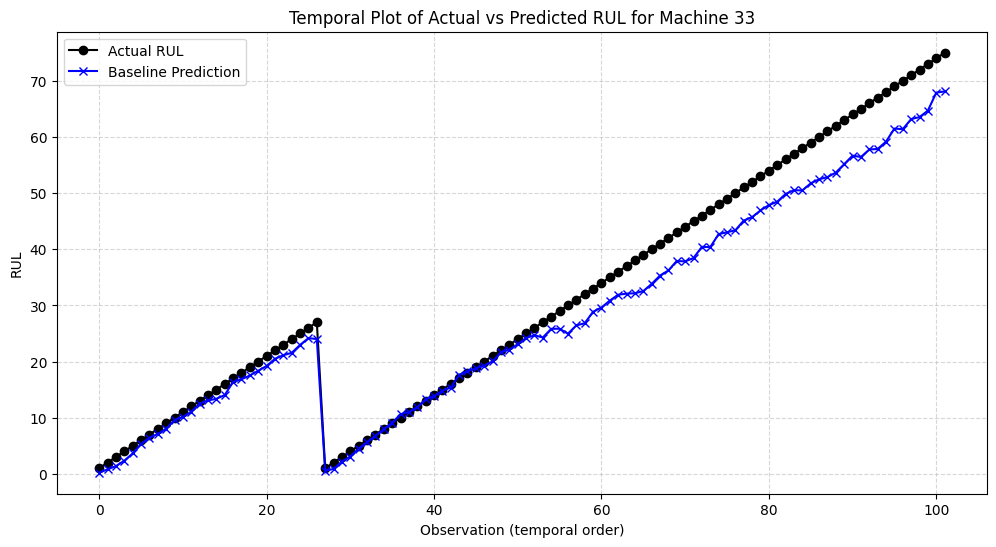

In [214]:
import matplotlib.pyplot as plt
import numpy as np

# ----- SETTINGS -----
machine_id = 33
baseline_col = 'predictions_24_cb'

# Filter machine and sort by datetime (to get correct temporal order)
machine_data = test[test['machineID'] == machine_id].sort_values('datetime')

# Use a relative time index instead of datetime
time_index = np.arange(len(machine_data))

# Clip predictions at 0
baseline_pred = np.clip(machine_data[baseline_col].values, 0, None)
actual_RUL = machine_data['RUL'].values

# ----- PLOT -----
plt.figure(figsize=(12,6))
plt.plot(time_index, actual_RUL, color='black', label='Actual RUL', marker='o')
plt.plot(time_index, baseline_pred, color='blue', label='Baseline Prediction', marker='x')

plt.xlabel("Observation (temporal order)")
plt.ylabel("RUL")
plt.title(f"Temporal Plot of Actual vs Predicted RUL for Machine {machine_id}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [226]:
test[(test['machineID'] == 33)]

,machineID,datetime,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,model,age,DI,RULWeek,failure,failed,RUL,RUL_I,predictions_24_rf,predictions_24_bgg,predictions_24_xgb,predictions_24_cb,predictions_5_rf,predictions_5_bgg,predictions_5_xgb,predictions_5_cb,RUL_scaled,RUL_pred_LSTM,RUL_from_RUL_I_pred,RUL_pred_Bayes,RUL_pred_std,alarm,pred_5% noise,pred_10% noise,pred_15% noise,pred_20% noise
2199,33,2015-01-05,1,181.063149,445.442863,97.914174,41.220799,21.547012,48.803979,9.308911,5.883469,0.907631,0.326189,-0.126274,-0.374000,0.687558,-0.787924,0.114443,0.145918,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.860744,1.0,none,0,1.0,26.0,1.00,1.0,1.513746,0.201882,1.00,1.0,0.412798,-0.381231,0.096654,NaN,NaN,-18.204906,28.163347,1,0.210284,-0.511839,-7.109551,0.755648
2200,33,2015-01-06,2,193.313805,480.227486,97.654565,39.113046,14.232953,54.275642,10.923896,4.371485,2.923321,0.748904,-0.209181,-0.308067,2.320486,0.188716,0.179475,0.086605,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.734833,1.0,none,0,2.0,25.0,2.05,2.0,1.627910,0.804895,2.11,2.1,2.353765,1.190163,0.092937,NaN,NaN,-14.484156,28.169154,1,2.562606,-0.718414,1.785974,2.014541
2201,33,2015-01-07,3,170.844534,443.432315,95.568256,39.669411,14.303200,46.099513,10.336188,6.017545,2.789581,0.688182,-0.359752,-0.113968,2.454843,0.240299,0.351102,-0.106408,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.613050,1.0,none,0,3.0,24.0,3.26,2.9,2.866093,1.368574,2.81,3.1,3.455099,2.670479,0.089219,NaN,NaN,-11.445552,28.169104,1,0.863976,2.327323,7.254036,8.712438
2202,33,2015-01-08,4,168.696368,450.792631,101.424508,39.251246,16.140231,48.794560,9.054005,4.091714,2.392647,0.677028,-0.551548,-0.534866,2.812968,0.243163,0.131191,-0.395860,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.495260,1.0,none,0,4.0,23.0,4.10,4.3,2.730520,2.355545,4.15,4.1,4.985616,2.935726,0.085502,NaN,NaN,-8.630936,28.168917,1,2.626035,2.764631,-1.152223,9.290850
2203,33,2015-01-09,5,170.193593,440.967511,97.395862,40.555048,15.288859,50.279966,7.969055,4.341488,2.287850,0.509374,-0.981593,-0.334018,2.899500,0.355615,-0.240269,-0.365747,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.381331,1.0,none,0,5.0,22.0,4.92,4.6,5.153858,3.630186,4.61,4.3,5.459618,4.099236,0.081784,NaN,NaN,-5.539625,28.169019,1,6.931304,5.470021,4.322722,-1.087417
2204,33,2015-01-10,6,166.737206,451.446598,102.164665,40.021275,15.291523,43.607164,12.749728,5.806803,1.207064,0.626558,-0.685995,-0.530951,3.111175,0.312742,-0.002231,-0.628792,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.271138,1.0,none,0,6.0,21.0,5.88,5.9,5.439092,5.333151,6.08,5.6,7.499889,5.516519,0.078067,NaN,NaN,-3.518411,28.171403,1,6.908118,3.745094,6.359826,6.958324
2205,33,2015-01-11,7,172.834835,461.123793,100.942222,39.961510,11.937802,40.926206,11.118104,3.642057,-0.337923,0.253681,-0.457356,-0.391653,-0.553154,-0.502937,0.010424,-0.718583,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.164557,1.0,none,0,7.0,20.0,6.68,6.6,6.082624,6.416898,6.82,6.8,6.944242,6.259179,0.074349,NaN,NaN,-0.053085,28.161465,1,5.191028,6.505526,4.855967,4.637706
2206,33,2015-01-12,8,177.284094,453.543322,96.834492,39.163717,12.694522,50.030811,10.537341,4.725813,0.147894,0.451034,-0.369296,-0.474676,0.208170,-0.575712,-0.129003,-0.633821,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-

In [228]:
# For a single machine example
machine_data = test[test['machineID'] == 33].sort_values('datetime')
machine_data = machine_data.reset_index(drop=True)
failure_indices = machine_data[machine_data['failed'] == 1].index.tolist()


mttr_cycles = []

for idx in failure_indices[:-1]:  # skip last failure for next start
    cur_cycle = machine_data['time_in_cycles'].iloc[idx]
    next_cycle = machine_data['time_in_cycles'].iloc[idx+1]
    mttr_cycles.append(next_cycle - cur_cycle)

print("MTTR in cycles:", mttr_cycles)


MTTR in cycles: [np.int64(137)]


In [219]:
import pandas as pd
import numpy as np

m_id = 31
machine_data = test[test['machineID'] == m_id].sort_values('datetime')

# Identify sequences
machine_data['seq_id'] = (machine_data['failed'] == 1).cumsum()

# ----- MTBF -----
# MTBF = time from start of sequence to failure
mtbf_list = []
for seq in machine_data['seq_id'].unique():
    seq_data = machine_data[machine_data['seq_id'] == seq]
    start_time = seq_data['datetime'].iloc[0]
    fail_time = seq_data['datetime'].iloc[-1]
    mtbf_list.append((fail_time - start_time).total_seconds() / 3600)  # in hours

MTBF = np.mean(mtbf_list)
print("MTBF (hours):", MTBF)

# ----- MTTR -----
# MTTR = time from failure to next start
mttr_list = []
seq_ids = machine_data['seq_id'].unique()
for i in range(len(seq_ids)-1):
    end_fail_time = machine_data[machine_data['seq_id']==seq_ids[i]]['datetime'].iloc[-1]
    next_start_time = machine_data[machine_data['seq_id']==seq_ids[i+1]]['datetime'].iloc[0]
    mttr_list.append((next_start_time - end_fail_time).total_seconds() / 3600)  # in hours

MTTR = np.mean(mttr_list)
print("MTTR (hours):", MTTR)

# ----- MTTA -----
# Assume alarm triggers if prediction <= threshold (e.g., 10 cycles left)
threshold = 10
mtta_list = []
for seq in machine_data['seq_id'].unique():
    seq_data = machine_data[machine_data['seq_id'] == seq]
    # Find first time prediction <= threshold
    alarm_idx = (seq_data['predictions_24_cb'] <= threshold).idxmax()
    fail_time = seq_data['datetime'].iloc[-1]
    alarm_time = seq_data.loc[alarm_idx, 'datetime']
    mtta_list.append((fail_time - alarm_time).total_seconds() / 3600)  # hours before failure

MTTA = np.mean(mtta_list)
print("MTTA (hours):", MTTA)


MTBF (hours): 516.0
MTTR (hours): 24.0
MTTA (hours): 516.0


In [234]:
import pandas as pd
import numpy as np

# Ensure datetime column is in datetime format
test['datetime'] = pd.to_datetime(test['datetime'])

# Initialize dictionary to store results
metrics_dict = {}

for machine in test['machineID'].unique():
    machine_data = test[test['machineID'] == machine].sort_values('datetime').reset_index(drop=True)
    
    # Identify failure points
    failure_indices = machine_data[machine_data['failed'] == 1].index.tolist()
    
    mtbf_list = []
    mttr_list = []
    mtta_list = []
    
    for i in range(len(failure_indices)-1):
        current_fail_idx = failure_indices[i]
        next_fail_idx = failure_indices[i+1]
        
        # MTBF: time between current failure and previous failure (or start)
        if i == 0:
            start_time = machine_data['datetime'].iloc[0]
        else:
            start_time = machine_data['datetime'].iloc[failure_indices[i-1]+1]  # after previous failure
        mtbf_hours = (machine_data['datetime'].iloc[current_fail_idx] - start_time).total_seconds() / 3600
        mtbf_list.append(mtbf_hours)
        
        # MTTR: downtime between this failure and next machine restart
        end_fail_time = machine_data['datetime'].iloc[current_fail_idx]
        next_start_time = machine_data['datetime'].iloc[current_fail_idx + 1]  # first row after failure
        mttr_hours = (next_start_time - end_fail_time).total_seconds() / 3600
        mttr_list.append(mttr_hours)
        
        # MTTA: alarm lead time for this failure (time from first prediction crossing threshold to failure)
        # Using RUL prediction, assume alarm triggered when predicted RUL < threshold (say 50 cycles)
        predicted_RUL = machine_data['predictions_24_cb'].iloc[:current_fail_idx+1]
        alarm_times = machine_data['datetime'].iloc[:current_fail_idx+1][predicted_RUL < 50]  # threshold example
        if not alarm_times.empty:
            mtta_hours = (end_fail_time - alarm_times.iloc[0]).total_seconds() / 3600
            mtta_list.append(mtta_hours)
    
    # Compute averages
    metrics_dict[machine] = {
        'MTBF_hours': np.mean(mtbf_list) if mtbf_list else np.nan,
        'MTTR_hours': np.mean(mttr_list) if mttr_list else np.nan,
        'MTTA_hours': np.mean(mtta_list) if mtta_list else np.nan
    }

# Convert to DataFrame
metrics_df_all = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df_all = metrics_df_all.dropna()


In [237]:
metrics_df_all

,MTBF_hours,MTTR_hours,MTTA_hours
5,1056.0,4344.0,1056.0
16,696.0,4704.0,696.0
17,696.0,3264.0,696.0
18,1056.0,2904.0,1056.0
21,1776.0,4344.0,1776.0
22,696.0,2904.0,696.0
24,1008.0,3984.0,1008.0
28,1704.0,3624.0,1704.0
32,696.0,2184.0,696.0
33,624.0,3264.0,624.0


In [220]:
metrics_dict = {}

for machine in test['machineID'].unique():
    machine_data = test[test['machineID'] == machine].sort_values('datetime').reset_index(drop=True)
    failure_indices = machine_data[machine_data['failed']==1].index.tolist()
    
    mtbf_list, mttr_list, mtta_list = [], [], []
    
    for i, cur_idx in enumerate(failure_indices):
        # MTBF: from previous failure (or start) to this failure
        start_time = machine_data['datetime'].iloc[0] if i==0 else machine_data['datetime'].iloc[failure_indices[i-1]+1]
        mtbf_hours = (machine_data['datetime'].iloc[cur_idx] - start_time).total_seconds()/3600
        mtbf_list.append(mtbf_hours)
        
        # MTTR: only if there is a next row after failure
        if cur_idx + 1 < len(machine_data):
            next_start_time = machine_data['datetime'].iloc[cur_idx + 1]
            end_fail_time = machine_data['datetime'].iloc[cur_idx]
            mttr_hours = (next_start_time - end_fail_time).total_seconds()/3600
            mttr_list.append(mttr_hours)
        
        # MTTA: only if alarm condition exists
        predicted_RUL = machine_data['predictions_24_cb'].iloc[:cur_idx+1]
        alarm_times = machine_data['datetime'].iloc[:cur_idx+1][predicted_RUL < 50]  # example threshold
        if not alarm_times.empty:
            mtta_hours = (machine_data['datetime'].iloc[cur_idx] - alarm_times.iloc[0]).total_seconds()/3600
            mtta_list.append(mtta_hours)
    
    metrics_dict[machine] = {
        'MTBF_hours': np.mean(mtbf_list) if mtbf_list else np.nan,
        'MTTR_hours': np.mean(mttr_list) if mttr_list else np.nan,
        'MTTA_hours': np.mean(mtta_list) if mtta_list else np.nan
    }

metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df


,MTBF_hours,MTTR_hours,MTTA_hours
1,1776.0,NaN,1776.0
2,696.0,NaN,696.0
3,1776.0,NaN,1776.0
4,2496.0,NaN,2496.0
5,1056.0,4344.0,3756.0
7,696.0,NaN,696.0
8,2496.0,NaN,2496.0
9,1056.0,NaN,1056.0
10,1776.0,NaN,1776.0
11,3936.0,NaN,3936.0


In [ ]:
21,33,43,79

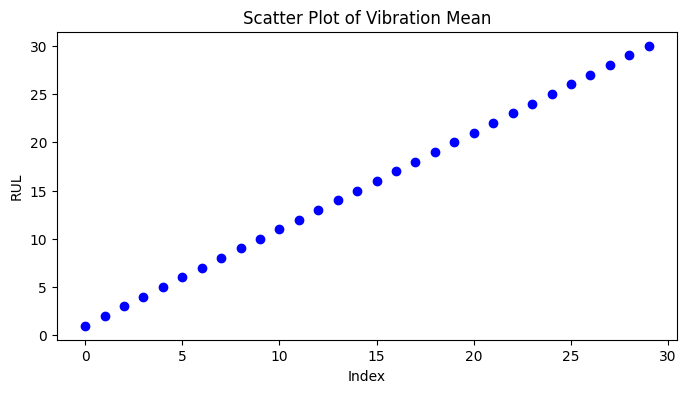

In [182]:
import matplotlib.pyplot as plt

# Example: single variable
machine_id = 2
y = test[test['machineID'] == machine_id]['RUL'] # your column

plt.figure(figsize=(8,4))
plt.scatter(range(len(y)), y, color='blue')
plt.xlabel("Index")
plt.ylabel("RUL")
plt.title("Scatter Plot of Vibration Mean")
plt.show()


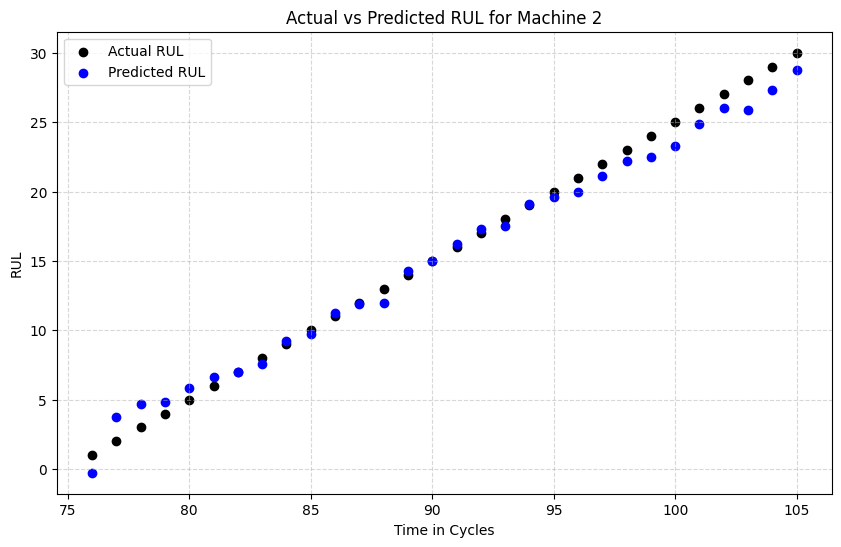

In [190]:
import matplotlib.pyplot as plt

machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles')

plt.figure(figsize=(10,6))
plt.scatter(machine_data['time_in_cycles'], machine_data['RUL'], color='black', label='Actual RUL')
plt.scatter(machine_data['time_in_cycles'], machine_data['predictions_24_cb'], color='blue', label='Predicted RUL')
plt.xlabel("Time in Cycles")
plt.ylabel("RUL")
plt.title(f"Actual vs Predicted RUL for Machine {machine_id}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


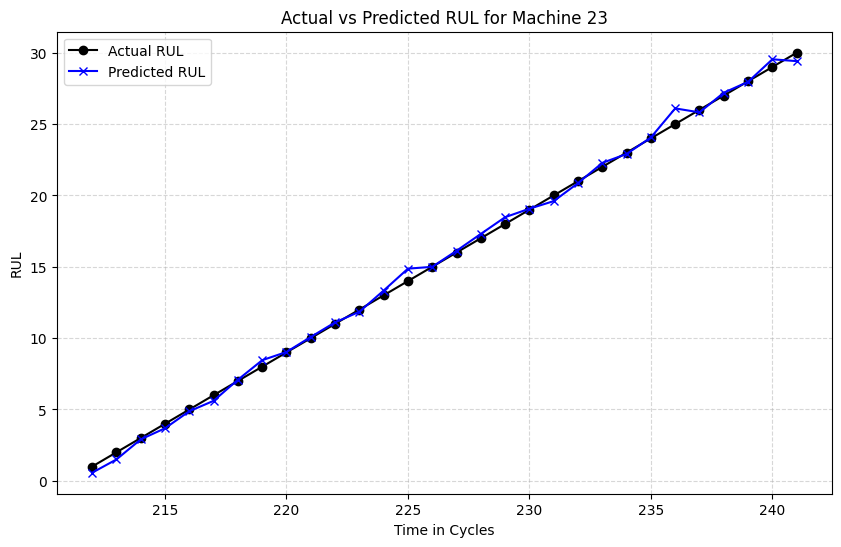

In [194]:
import matplotlib.pyplot as plt
machine_id = 23
machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles')

plt.figure(figsize=(10,6))

# Line plot for actual RUL
plt.plot(machine_data['time_in_cycles'], machine_data['RUL'], color='black', label='Actual RUL', marker='o')

# Line plot for predicted RUL
plt.plot(machine_data['time_in_cycles'], machine_data['predictions_24_cb'], color='blue', label='Predicted RUL', marker='x')

plt.xlabel("Time in Cycles")
plt.ylabel("RUL")
plt.title(f"Actual vs Predicted RUL for Machine {machine_id}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [196]:
# Loop through noise levels and add predictions as new columns
for noise in results_df_noise.index.get_level_values('Noise_Level').unique():
    col_name = f"pred_{noise}"  # e.g., pred_5%_noise
    # Access predictions for this noise & model
    preds_all_machines = results_df_noise.xs((noise, 'CatBoost')).predictions
    # Make sure it's a flat array per row in test
    test[col_name] = np.concatenate([np.array(p).flatten() for p in preds_all_machines])


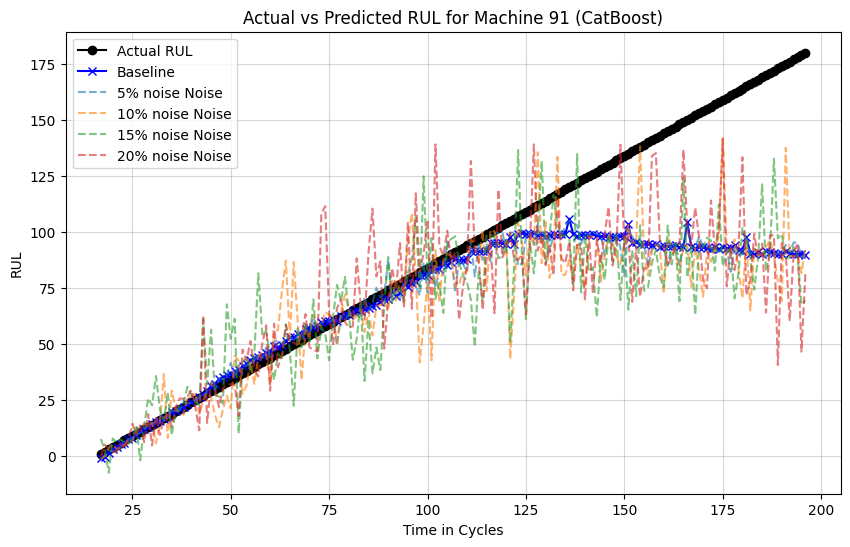

In [199]:
machine_data = test[test['machineID']==52].sort_values('time_in_cycles')
plt.figure(figsize=(10,6))

plt.plot(machine_data['time_in_cycles'], machine_data['RUL'], color='black', label='Actual RUL', marker='o')
plt.plot(machine_data['time_in_cycles'], machine_data['predictions_24_cb'], color='blue', label='Baseline', marker='x')

# Plot all noisy predictions
for noise in results_df_noise.index.get_level_values('Noise_Level').unique():
    col_name = f"pred_{noise}"
    plt.plot(machine_data['time_in_cycles'], machine_data[col_name], linestyle='--', alpha=0.6, label=f"{noise} Noise")

plt.xlabel("Time in Cycles")
plt.ylabel("RUL")
plt.title(f"Actual vs Predicted RUL for Machine {machine_id} (CatBoost)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


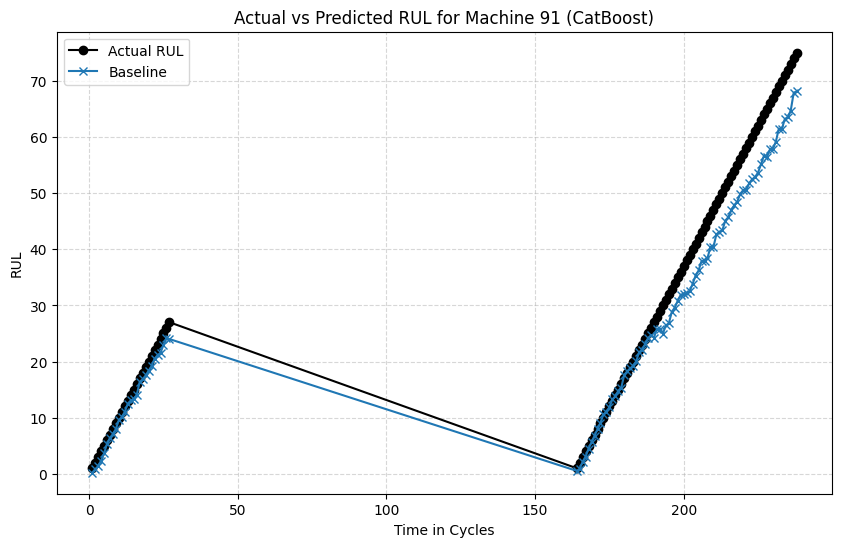

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- SETTINGS -----
machine_data = test[test['machineID']==33].sort_values('time_in_cycles')
time_cycles = machine_data['time_in_cycles']

# Define colors: baseline black + CatBoost blue + noises as shades of red
colors = {
    'Actual RUL': 'black',
    'Baseline': 'tab:blue',
    '5% Noise': 'tab:red',
    '10% Noise': 'indianred',
    '15% Noise': 'lightcoral',
    '20% Noise': 'salmon'
}

plt.figure(figsize=(10,6))

# Actual RUL
plt.plot(time_cycles, machine_data['RUL'], color=colors['Actual RUL'], label='Actual RUL', marker='o')

# Baseline prediction
plt.plot(time_cycles, machine_data['predictions_24_cb'], color=colors['Baseline'], label='Baseline', marker='x')

# Noisy predictions
noise_levels = ['5% Noise','10% Noise','15% Noise','20% Noise']  # adjust to your column names
for noise in noise_levels:
    col_name = f"pred_{noise}"  # make sure matches your column names
    if col_name in machine_data.columns:
        plt.plot(time_cycles, machine_data[col_name], linestyle='--', alpha=0.8, color=colors[noise], label=noise)

plt.xlabel("Time in Cycles")
plt.ylabel("RUL")
plt.title(f"Actual vs Predicted RUL for Machine {machine_id} (CatBoost)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
test[test[]]

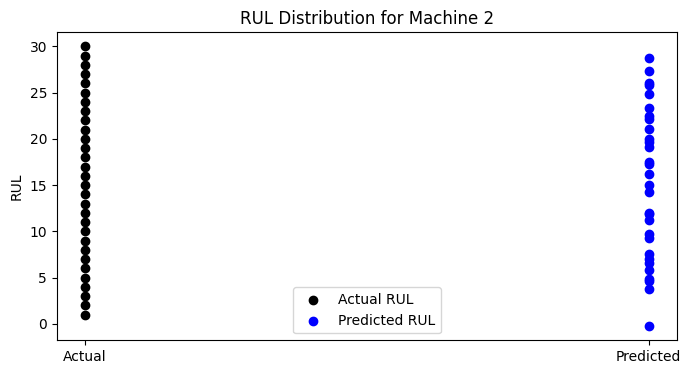

In [192]:
plt.figure(figsize=(8,4))
plt.scatter(np.zeros_like(machine_data['RUL']), machine_data['RUL'], color='black', label='Actual RUL')
plt.scatter(np.ones_like(machine_data['predictions_24_cb']), machine_data['predictions_24_cb'], color='blue', label='Predicted RUL')
plt.xticks([0,1], ['Actual', 'Predicted'])
plt.ylabel("RUL")
plt.title(f"RUL Distribution for Machine {machine_id}")
plt.legend()
plt.show()


In [238]:
test[(test['machineID'] == 33)&(test['failed'] ==1 )]

,machineID,datetime,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,model,age,DI,RULWeek,failure,failed,RUL,RUL_I,predictions_24_rf,predictions_24_bgg,predictions_24_xgb,predictions_24_cb,predictions_5_rf,predictions_5_bgg,predictions_5_xgb,predictions_5_cb,RUL_scaled,RUL_pred_LSTM,RUL_from_RUL_I_pred,RUL_pred_Bayes,RUL_pred_std,alarm,pred_5% noise,pred_10% noise,pred_15% noise,pred_20% noise
2225,33,2015-01-31,27,181.233952,457.445800,99.112897,44.689836,16.138768,50.395021,9.007228,7.329827,2.809696,0.701532,-0.156172,3.303861,2.364536,-0.536932,-0.414161,2.617529,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,2.764443,-0.11344,-0.105064,2.902132,model3,0.460946,-0.365473,4.0,comp1,1,27.0,0.0,24.81,25.0,24.836744,24.007604,24.95,24.9,27.829840,23.527816,0.0,NaN,NaN,50.745130,28.182460,0,25.286583,32.968208,32.011183,16.746424
2300,33,2015-08-29,238,165.557447,461.649853,95.884406,43.913102,15.300075,39.859149,9.775862,6.967573,-0.790942,-0.461172,-0.877543,3.245603,-0.644847,0.168556,-0.188031,2.180999,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.11344,8.621582,8.254361,model3,0.460946,-1.653937,11.0,comp4,1,75.0,0.0,69.72,71.5,67.948738,68.115514,67.26,71.1,69.108788,69.381101,0.0,NaN,NaN,105.038163,28.254282,0,66.031332,56.207731,91.929102,57.175363


In [239]:
test[(test['machineID'] == 33)]

,machineID,datetime,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,model,age,DI,RULWeek,failure,failed,RUL,RUL_I,predictions_24_rf,predictions_24_bgg,predictions_24_xgb,predictions_24_cb,predictions_5_rf,predictions_5_bgg,predictions_5_xgb,predictions_5_cb,RUL_scaled,RUL_pred_LSTM,RUL_from_RUL_I_pred,RUL_pred_Bayes,RUL_pred_std,alarm,pred_5% noise,pred_10% noise,pred_15% noise,pred_20% noise
2199,33,2015-01-05,1,181.063149,445.442863,97.914174,41.220799,21.547012,48.803979,9.308911,5.883469,0.907631,0.326189,-0.126274,-0.374000,0.687558,-0.787924,0.114443,0.145918,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.860744,1.0,none,0,1.0,26.0,1.00,1.0,1.513746,0.201882,1.00,1.0,0.412798,-0.381231,0.096654,NaN,NaN,-18.204906,28.163347,1,0.210284,-0.511839,-7.109551,0.755648
2200,33,2015-01-06,2,193.313805,480.227486,97.654565,39.113046,14.232953,54.275642,10.923896,4.371485,2.923321,0.748904,-0.209181,-0.308067,2.320486,0.188716,0.179475,0.086605,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.734833,1.0,none,0,2.0,25.0,2.05,2.0,1.627910,0.804895,2.11,2.1,2.353765,1.190163,0.092937,NaN,NaN,-14.484156,28.169154,1,2.562606,-0.718414,1.785974,2.014541
2201,33,2015-01-07,3,170.844534,443.432315,95.568256,39.669411,14.303200,46.099513,10.336188,6.017545,2.789581,0.688182,-0.359752,-0.113968,2.454843,0.240299,0.351102,-0.106408,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.613050,1.0,none,0,3.0,24.0,3.26,2.9,2.866093,1.368574,2.81,3.1,3.455099,2.670479,0.089219,NaN,NaN,-11.445552,28.169104,1,0.863976,2.327323,7.254036,8.712438
2202,33,2015-01-08,4,168.696368,450.792631,101.424508,39.251246,16.140231,48.794560,9.054005,4.091714,2.392647,0.677028,-0.551548,-0.534866,2.812968,0.243163,0.131191,-0.395860,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.495260,1.0,none,0,4.0,23.0,4.10,4.3,2.730520,2.355545,4.15,4.1,4.985616,2.935726,0.085502,NaN,NaN,-8.630936,28.168917,1,2.626035,2.764631,-1.152223,9.290850
2203,33,2015-01-09,5,170.193593,440.967511,97.395862,40.555048,15.288859,50.279966,7.969055,4.341488,2.287850,0.509374,-0.981593,-0.334018,2.899500,0.355615,-0.240269,-0.365747,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.381331,1.0,none,0,5.0,22.0,4.92,4.6,5.153858,3.630186,4.61,4.3,5.459618,4.099236,0.081784,NaN,NaN,-5.539625,28.169019,1,6.931304,5.470021,4.322722,-1.087417
2204,33,2015-01-10,6,166.737206,451.446598,102.164665,40.021275,15.291523,43.607164,12.749728,5.806803,1.207064,0.626558,-0.685995,-0.530951,3.111175,0.312742,-0.002231,-0.628792,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.271138,1.0,none,0,6.0,21.0,5.88,5.9,5.439092,5.333151,6.08,5.6,7.499889,5.516519,0.078067,NaN,NaN,-3.518411,28.171403,1,6.908118,3.745094,6.359826,6.958324
2205,33,2015-01-11,7,172.834835,461.123793,100.942222,39.961510,11.937802,40.926206,11.118104,3.642057,-0.337923,0.253681,-0.457356,-0.391653,-0.553154,-0.502937,0.010424,-0.718583,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.164557,1.0,none,0,7.0,20.0,6.68,6.6,6.082624,6.416898,6.82,6.8,6.944242,6.259179,0.074349,NaN,NaN,-0.053085,28.161465,1,5.191028,6.505526,4.855967,4.637706
2206,33,2015-01-12,8,177.284094,453.543322,96.834492,39.163717,12.694522,50.030811,10.537341,4.725813,0.147894,0.451034,-0.369296,-0.474676,0.208170,-0.575712,-0.129003,-0.633821,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-

In [186]:
test['machineID'].value_counts()

machineID
100    210
82     210
28     207
34     195
54     180
52     180
11     165
96     164
30     135
68     135
50     135
79     133
95     121
81     120
70     120
39     120
62     120
8      105
21     105
4      105
24     103
73     103
33     102
26      92
42      90
66      90
18      90
5       90
94      90
10      75
1       75
3       75
69      75
38      75
75      75
86      75
90      75
67      75
36      75
53      75
22      75
32      75
19      75
16      75
91      73
93      72
44      71
47      60
88      60
84      60
59      60
51      60
58      60
35      60
64      60
49      60
17      60
15      60
12      60
43      60
61      54
46      49
9       45
92      45
55      45
40      45
97      45
87      45
76      45
56      45
31      45
48      45
63      45
57      34
20      30
7       30
2       30
13      30
23      30
89      30
25      30
83      30
65      30
37      30
80      30
45      30
71      30
98      30
85      30
78      30


In [242]:
import numpy as np

def compute_mtta(df, alarm_threshold=):
    mtta_values = []

    for m_id, machine_data in df.groupby('machineID'):
        machine_data = machine_data.sort_values('time_in_cycles')

        # failure cycles
        failure_cycles = machine_data.loc[machine_data['failed'] == 1, 'time_in_cycles'].values

        for fail_cycle in failure_cycles:
            # data BEFORE failure
            pre_failure = machine_data[machine_data['time_in_cycles'] < fail_cycle]

            # first alarm before failure
            alarms = pre_failure[pre_failure['predictions_24_cb'] <= alarm_threshold]

            if not alarms.empty:
                alarm_cycle = alarms.iloc[0]['time_in_cycles']
                mtta_values.append(fail_cycle - alarm_cycle)

    return np.mean(mtta_values) if mtta_values else np.nan


In [253]:
ALARM_THRESHOLD = 0  # cycles

mtta = compute_mtta(test, alarm_threshold=ALARM_THRESHOLD)
print(f"MTTA (cycles): {mtta:.2f}")


MTTA (cycles): 98.08


In [249]:
def compute_mtta_per_machine(df, alarm_threshold=20):
    results = {}

    for m_id, machine_data in df.groupby('machineID'):
        machine_data = machine_data.sort_values('time_in_cycles')
        failure_cycles = machine_data.loc[machine_data['failed'] == 1, 'time_in_cycles'].values

        mtta_vals = []
        for fail_cycle in failure_cycles:
            pre_failure = machine_data[machine_data['time_in_cycles'] < fail_cycle]
            alarms = pre_failure[pre_failure['predictions_24_cb'] <= alarm_threshold]

            if not alarms.empty:
                alarm_cycle = alarms.iloc[0]['time_in_cycles']
                mtta_vals.append(fail_cycle - alarm_cycle)

        if mtta_vals:
            results[m_id] = np.mean(mtta_vals)

    return results


In [254]:
ALARM_THRESHOLD = 10  # cycles
mtta = compute_mtta_per_machine(test, alarm_threshold=ALARM_THRESHOLD)

print("MTTA (cycles) per machine:")
for machine_id, value in mtta.items():
    print(f"Machine {machine_id}: {value:.2f} cycles")


MTTA (cycles) per machine:
Machine 1: 74.00 cycles
Machine 2: 29.00 cycles
Machine 3: 74.00 cycles
Machine 4: 104.00 cycles
Machine 5: 156.50 cycles
Machine 7: 29.00 cycles
Machine 8: 104.00 cycles
Machine 9: 44.00 cycles
Machine 10: 74.00 cycles
Machine 11: 164.00 cycles
Machine 12: 59.00 cycles
Machine 13: 29.00 cycles
Machine 14: 26.00 cycles
Machine 15: 59.00 cycles
Machine 16: 149.50 cycles
Machine 17: 112.00 cycles
Machine 18: 126.50 cycles
Machine 19: 74.00 cycles
Machine 20: 29.00 cycles
Machine 21: 179.50 cycles
Machine 22: 112.00 cycles
Machine 23: 29.00 cycles
Machine 24: 154.50 cycles
Machine 25: 29.00 cycles
Machine 26: 91.00 cycles
Machine 28: 213.50 cycles
Machine 30: 134.00 cycles
Machine 31: 44.00 cycles
Machine 32: 96.50 cycles
Machine 33: 131.50 cycles
Machine 34: 194.00 cycles
Machine 35: 59.00 cycles
Machine 36: 74.00 cycles
Machine 37: 29.00 cycles
Machine 38: 74.00 cycles
Machine 39: 119.00 cycles
Machine 40: 44.00 cycles
Machine 41: 27.00 cycles
Machine 42: 126.

In [256]:
ALARM_THRESHOLD = 5  # cycles
mtta = compute_mtta_per_machine(test, alarm_threshold=ALARM_THRESHOLD)

print("MTTA (cycles) per machine:")
for machine_id, value in mtta.items():
    print(f"Machine {machine_id}: {value:.2f} cycles")


MTTA (cycles) per machine:
Machine 1: 74.00 cycles
Machine 2: 29.00 cycles
Machine 3: 74.00 cycles
Machine 4: 104.00 cycles
Machine 5: 156.50 cycles
Machine 7: 29.00 cycles
Machine 8: 104.00 cycles
Machine 9: 44.00 cycles
Machine 10: 74.00 cycles
Machine 11: 164.00 cycles
Machine 12: 59.00 cycles
Machine 13: 29.00 cycles
Machine 14: 26.00 cycles
Machine 15: 59.00 cycles
Machine 16: 149.50 cycles
Machine 17: 112.00 cycles
Machine 18: 126.50 cycles
Machine 19: 74.00 cycles
Machine 20: 29.00 cycles
Machine 21: 179.50 cycles
Machine 22: 112.00 cycles
Machine 23: 29.00 cycles
Machine 24: 154.50 cycles
Machine 25: 29.00 cycles
Machine 26: 91.00 cycles
Machine 28: 213.50 cycles
Machine 30: 134.00 cycles
Machine 31: 44.00 cycles
Machine 32: 96.50 cycles
Machine 33: 131.50 cycles
Machine 35: 59.00 cycles
Machine 36: 74.00 cycles
Machine 37: 29.00 cycles
Machine 38: 74.00 cycles
Machine 39: 119.00 cycles
Machine 40: 44.00 cycles
Machine 41: 27.00 cycles
Machine 42: 126.50 cycles
Machine 43: 59.0

In [257]:
def compute_mtta_per_machine(df, alarm_threshold=20):
    mtta_per_machine = {}

    for machine_id in df['machineID'].unique():
        machine_data = df[df['machineID'] == machine_id].sort_values('time_in_cycles')
        predicted_rul = machine_data['predictions_24_cb'].values
        actual_rul = machine_data['RUL'].values
        time_cycles = machine_data['time_in_cycles'].values

        failure_indices = np.where(actual_rul == 0)[0]  # or first point after failure
        mtta_list = []

        for idx in failure_indices:
            # Find first cycle where predicted RUL ≤ threshold before failure
            alarm_idx_candidates = np.where(predicted_rul[:idx+1] <= alarm_threshold)[0]
            if len(alarm_idx_candidates) > 0:
                alarm_idx = alarm_idx_candidates[0]
                mtta_list.append(time_cycles[idx] - time_cycles[alarm_idx])
            # else: no alarm triggered before failure; skip or record 0

        if mtta_list:
            mtta_per_machine[machine_id] = np.mean(mtta_list)
        else:
            mtta_per_machine[machine_id] = np.nan  # no alarm triggered

    return mtta_per_machine


In [258]:
ALARM_THRESHOLD = 20  # cycles
mtta_dict = compute_mtta_per_machine(test, alarm_threshold=ALARM_THRESHOLD)

# Convert to DataFrame for plotting
mtta_df = pd.DataFrame.from_dict(mtta_dict, orient='index', columns=['MTTA_cycles'])
mtta_df.reset_index(inplace=True)
mtta_df.rename(columns={'index':'machineID'}, inplace=True)

# ---------- SUMMARY ----------
print("MTTA per machine (cycles):")
print(mtta_df)

print(f"\nOverall average MTTA: {mtta_df['MTTA_cycles'].mean():.2f} cycles")


MTTA per machine (cycles):
    machineID  MTTA_cycles
0           1          NaN
1           2          NaN
2           3          NaN
3           4          NaN
4           5          NaN
5           7          NaN
6           8          NaN
7           9          NaN
8          10          NaN
9          11          NaN
10         12          NaN
11         13          NaN
12         14          NaN
13         15          NaN
14         16          NaN
15         17          NaN
16         18          NaN
17         19          NaN
18         20          NaN
19         21          NaN
20         22          NaN
21         23          NaN
22         24          NaN
23         25          NaN
24         26          NaN
25         28          NaN
26         30          NaN
27         31          NaN
28         32          NaN
29         33          NaN
30         34          NaN
31         35          NaN
32         36          NaN
33         37          NaN
34         38          NaN
3

In [261]:
test[(test['machineID'] == 33)&(test['predictions_24_cb'] < 20)].shape

(41, 54)

In [262]:
machine_id = 33
alarm_threshold = 20

machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles')
predicted_rul = np.array([val if np.isscalar(val) else val[0] for val in machine_data['predictions_24_cb']])
time_cycles = machine_data['time_in_cycles'].values
actual_rul = machine_data['RUL'].values

# Find failure indices
failure_indices = np.where(actual_rul == 0)[0]

mtta_list = []

for idx in failure_indices:
    # Look at all predictions before failure
    alarm_idx_candidates = np.where(predicted_rul[:idx] <= alarm_threshold)[0]
    
    if len(alarm_idx_candidates) > 0:
        alarm_idx = alarm_idx_candidates[0]  # first time the alarm triggers
        mtta_list.append(time_cycles[idx] - time_cycles[alarm_idx])
    else:
        pass  # no alarm before failure

print("MTTA (cycles) for Machine 33:", np.mean(mtta_list))


MTTA (cycles) for Machine 33: nan


C:\Users\ismai\anaconda3\envs\project_1_2\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ismai\anaconda3\envs\project_1_2\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [266]:
import numpy as np

machine_id = 33
alarm_threshold = 5  # cycles

# Select the machine and sort by time_in_cycles
machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles')

predicted_rul = machine_data['predictions_24_cb'].values
time_cycles = machine_data['time_in_cycles'].values
actual_rul = machine_data['RUL'].values

# Identify failure points (RUL <= 1 as proxy)
failure_indices = np.where(actual_rul <= 1)[0]

mtta_list = []

for idx in failure_indices:
    # Find first time predicted RUL goes below threshold before failure
    alarm_idx_candidates = np.where(predicted_rul[:idx] <= alarm_threshold)[0]
    
    if len(alarm_idx_candidates) > 0:
        alarm_idx = alarm_idx_candidates[0]
        mtta_list.append(time_cycles[idx] - time_cycles[alarm_idx])

if len(mtta_list) > 0:
    print(f"MTTA (cycles) for Machine {machine_id}: {np.mean(mtta_list):.2f}")
else:
    print(f"No alarms triggered before failure for Machine {machine_id}")


MTTA (cycles) for Machine 33: 163.00


In [267]:
machine_id = 33
machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles')
predicted_rul = machine_data['predictions_24_cb'].values
actual_rul = machine_data['RUL'].values

failure_idx = np.where(actual_rul <= 1)[0][0]  # first failure
print(predicted_rul[:failure_idx])


[]


In [270]:
def compute_mtta(machine_data, prediction_col='predictions_24_cb', failure_col='RUL', threshold=20):
    """
    machine_data: DataFrame for a single machine, sorted by time_in_cycles
    prediction_col: column with predicted RUL
    failure_col: column with actual RUL
    threshold: cycles to trigger alarm
    """
    # Sort by time_in_cycles just in case
    machine_data = machine_data.sort_values('time_in_cycles').reset_index(drop=True)

    predicted_rul = machine_data[prediction_col].values
    time_cycles = machine_data['time_in_cycles'].values
    failure_index = machine_data[failure_col].idxmin()  # first failure index (or wherever RUL=0)

    # indices where prediction <= threshold **before failure**
    alarm_indices = np.where(predicted_rul <= threshold)[0]
    alarm_indices_before_failure = alarm_indices[alarm_indices <= failure_index]

    if len(alarm_indices_before_failure) == 0:
        return np.nan  # no alarm triggered before failure

    first_alarm_idx = alarm_indices_before_failure[0]

    mtta = time_cycles[failure_index] - time_cycles[first_alarm_idx]
    return mtta

# Example usage
machine_id = 33
machine_data = test[test['machineID'] == machine_id]
mtta_cycles = compute_mtta(machine_data, threshold=5)
print(f"MTTA (cycles) for Machine {machine_id}: {mtta_cycles:.2f}")


MTTA (cycles) for Machine 33: 0.00


In [271]:
import numpy as np

def compute_mtta(machine_data, prediction_col='predictions_24_cb', threshold=20):
    """
    Compute MTTA in cycles for a single machine.
    """
    # Sort by cycles
    machine_data = machine_data.sort_values('time_in_cycles').reset_index(drop=True)
    predicted_rul = machine_data[prediction_col].values
    time_cycles = machine_data['time_in_cycles'].values

    # Take failure as last cycle
    failure_cycle = time_cycles[-1]

    # Find first cycle where predicted RUL <= threshold
    alarm_idx = np.where(predicted_rul <= threshold)[0]
    
    if len(alarm_idx) == 0:
        return np.nan  # no alarm triggered

    first_alarm_cycle = time_cycles[alarm_idx[0]]
    mtta = failure_cycle - first_alarm_cycle
    return mtta

# Compute MTTA for all machines
mtta_dict = {}
for machine_id in test['machineID'].unique():
    machine_data = test[test['machineID'] == machine_id]
    mtta_dict[machine_id] = compute_mtta(machine_data, threshold=20)

# Show results
for mid, mtta in mtta_dict.items():
    print(f"Machine {mid}: MTTA (cycles) = {mtta}")


Machine 1: MTTA (cycles) = 74
Machine 2: MTTA (cycles) = 29
Machine 3: MTTA (cycles) = 74
Machine 4: MTTA (cycles) = 104
Machine 5: MTTA (cycles) = 269
Machine 7: MTTA (cycles) = 29
Machine 8: MTTA (cycles) = 104
Machine 9: MTTA (cycles) = 44
Machine 10: MTTA (cycles) = 74
Machine 11: MTTA (cycles) = 164
Machine 12: MTTA (cycles) = 59
Machine 13: MTTA (cycles) = 29
Machine 14: MTTA (cycles) = 26
Machine 15: MTTA (cycles) = 59
Machine 16: MTTA (cycles) = 270
Machine 17: MTTA (cycles) = 195
Machine 18: MTTA (cycles) = 209
Machine 19: MTTA (cycles) = 74
Machine 20: MTTA (cycles) = 29
Machine 21: MTTA (cycles) = 285
Machine 22: MTTA (cycles) = 195
Machine 23: MTTA (cycles) = 29
Machine 24: MTTA (cycles) = 267
Machine 25: MTTA (cycles) = 29
Machine 26: MTTA (cycles) = 91
Machine 28: MTTA (cycles) = 356
Machine 30: MTTA (cycles) = 134
Machine 31: MTTA (cycles) = 44
Machine 32: MTTA (cycles) = 164
Machine 33: MTTA (cycles) = 237
Machine 34: MTTA (cycles) = 194
Machine 35: MTTA (cycles) = 59
M

In [279]:
# Settings
machine_id = 33
threshold = 10
prediction_col = 'predictions_24_cb'
machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles').reset_index(drop=True)
print("Machine Data (first 5 rows):")
print(machine_data.head())
print("\n")

Machine Data (first 5 rows):
   machineID   datetime  time_in_cycles  voltmean_24h  rotatemean_24h  \
0         33 2015-01-05               1    181.063149      445.442863   
1         33 2015-01-06               2    193.313805      480.227486   
2         33 2015-01-07               3    170.844534      443.432315   
3         33 2015-01-08               4    168.696368      450.792631   
4         33 2015-01-09               5    170.193593      440.967511   

   pressuremean_24h  vibrationmean_24h  voltsd_24h  rotatesd_24h  \
0         97.914174          41.220799   21.547012     48.803979   
1         97.654565          39.113046   14.232953     54.275642   
2         95.568256          39.669411   14.303200     46.099513   
3        101.424508          39.251246   16.140231     48.794560   
4         97.395862          40.555048   15.288859     50.279966   

   pressuresd_24h  vibrationsd_24h  voltmean_5d  rotatemean_5d  \
0        9.308911         5.883469     0.907631       0.3

In [280]:
# Step 2: Get predictions and time_in_cycles arrays
predicted_rul = machine_data[prediction_col].values
time_cycles = machine_data['time_in_cycles'].values
print("Predicted RUL (first 10):", predicted_rul[:10])
print("Time in cycles (first 10):", time_cycles[:10])
print("\n")

Predicted RUL (first 10): [0.20188227 0.80489495 1.36857367 2.35554486 3.63018603 5.33315054
 6.4168976  7.09426055 8.02382225 9.59590251]
Time in cycles (first 10): [ 1  2  3  4  5  6  7  8  9 10]




In [281]:
# Step 3: Determine failure cycle (last cycle for this machine)
failure_cycle = time_cycles[-1]
print("Failure cycle:", failure_cycle)
print("\n")

Failure cycle: 238




In [282]:
alarm_idx = np.where(predicted_rul <= threshold)[0]
print("Indices where predicted RUL <= threshold:", alarm_idx)
print("\n")

Indices where predicted RUL <= threshold: [ 0  1  2  3  4  5  6  7  8  9 27 28 29 30 31 32 33 34 35]




In [283]:
if len(alarm_idx) == 0:
    print("No alarm triggered for this threshold.")
    mtta = np.nan
else:
    first_alarm_cycle = time_cycles[alarm_idx[0]]
    print("First alarm cycle:", first_alarm_cycle)

First alarm cycle: 1


In [284]:
mtta = failure_cycle - first_alarm_cycle
print("MTTA (cycles) =", mtta)

MTTA (cycles) = 237


In [290]:
import numpy as np

machine_id = 33
threshold = 5
prediction_col = 'predictions_24_cb'

machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles').reset_index(drop=True)
time_cycles = machine_data['time_in_cycles'].values
predicted_rul = machine_data[prediction_col].values
failures = machine_data['failed'].values  # 1 if failure, 0 otherwise

# Get indices where failure occurred
failure_indices = np.where(failures == 1)[0]
print("Failure indices:", failure_indices)

mtta_list = []

for f_idx in failure_indices:
    # Find first alarm before failure
    alarm_idx = np.where(predicted_rul[:f_idx+1] >= threshold)[0]

    
    if len(alarm_idx) == 0:
        print(f"No alarm triggered before failure at cycle {time_cycles[f_idx]}")
        continue
    
    first_alarm_cycle = time_cycles[alarm_idx[0]]
    mtta = time_cycles[f_idx] - first_alarm_cycle
    print(f"Failure at cycle {time_cycles[f_idx]}, first alarm at {first_alarm_cycle}, MTTA = {mtta}")
    mtta_list.append(mtta)

if len(mtta_list) > 0:
    machine_mtta = np.mean(mtta_list)
    print(f"\nAverage MTTA for machine {machine_id}: {machine_mtta:.2f} cycles")
else:
    print(f"\nNo MTTA could be calculated for machine {machine_id}")


Failure indices: [ 26 101]
Failure at cycle 27, first alarm at 6, MTTA = 21
Failure at cycle 238, first alarm at 6, MTTA = 232

Average MTTA for machine 33: 126.50 cycles


In [288]:
test[test['machineID'] == 33]

,machineID,datetime,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,model,age,DI,RULWeek,failure,failed,RUL,RUL_I,predictions_24_rf,predictions_24_bgg,predictions_24_xgb,predictions_24_cb,predictions_5_rf,predictions_5_bgg,predictions_5_xgb,predictions_5_cb,RUL_scaled,RUL_pred_LSTM,RUL_from_RUL_I_pred,RUL_pred_Bayes,RUL_pred_std,alarm,pred_5% noise,pred_10% noise,pred_15% noise,pred_20% noise
2199,33,2015-01-05,1,181.063149,445.442863,97.914174,41.220799,21.547012,48.803979,9.308911,5.883469,0.907631,0.326189,-0.126274,-0.374000,0.687558,-0.787924,0.114443,0.145918,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.860744,1.0,none,0,1.0,26.0,1.00,1.0,1.513746,0.201882,1.00,1.0,0.412798,-0.381231,0.096654,NaN,NaN,-18.204906,28.163347,1,0.210284,-0.511839,-7.109551,0.755648
2200,33,2015-01-06,2,193.313805,480.227486,97.654565,39.113046,14.232953,54.275642,10.923896,4.371485,2.923321,0.748904,-0.209181,-0.308067,2.320486,0.188716,0.179475,0.086605,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.734833,1.0,none,0,2.0,25.0,2.05,2.0,1.627910,0.804895,2.11,2.1,2.353765,1.190163,0.092937,NaN,NaN,-14.484156,28.169154,1,2.562606,-0.718414,1.785974,2.014541
2201,33,2015-01-07,3,170.844534,443.432315,95.568256,39.669411,14.303200,46.099513,10.336188,6.017545,2.789581,0.688182,-0.359752,-0.113968,2.454843,0.240299,0.351102,-0.106408,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.613050,1.0,none,0,3.0,24.0,3.26,2.9,2.866093,1.368574,2.81,3.1,3.455099,2.670479,0.089219,NaN,NaN,-11.445552,28.169104,1,0.863976,2.327323,7.254036,8.712438
2202,33,2015-01-08,4,168.696368,450.792631,101.424508,39.251246,16.140231,48.794560,9.054005,4.091714,2.392647,0.677028,-0.551548,-0.534866,2.812968,0.243163,0.131191,-0.395860,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.495260,1.0,none,0,4.0,23.0,4.10,4.3,2.730520,2.355545,4.15,4.1,4.985616,2.935726,0.085502,NaN,NaN,-8.630936,28.168917,1,2.626035,2.764631,-1.152223,9.290850
2203,33,2015-01-09,5,170.193593,440.967511,97.395862,40.555048,15.288859,50.279966,7.969055,4.341488,2.287850,0.509374,-0.981593,-0.334018,2.899500,0.355615,-0.240269,-0.365747,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.381331,1.0,none,0,5.0,22.0,4.92,4.6,5.153858,3.630186,4.61,4.3,5.459618,4.099236,0.081784,NaN,NaN,-5.539625,28.169019,1,6.931304,5.470021,4.322722,-1.087417
2204,33,2015-01-10,6,166.737206,451.446598,102.164665,40.021275,15.291523,43.607164,12.749728,5.806803,1.207064,0.626558,-0.685995,-0.530951,3.111175,0.312742,-0.002231,-0.628792,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.271138,1.0,none,0,6.0,21.0,5.88,5.9,5.439092,5.333151,6.08,5.6,7.499889,5.516519,0.078067,NaN,NaN,-3.518411,28.171403,1,6.908118,3.745094,6.359826,6.958324
2205,33,2015-01-11,7,172.834835,461.123793,100.942222,39.961510,11.937802,40.926206,11.118104,3.642057,-0.337923,0.253681,-0.457356,-0.391653,-0.553154,-0.502937,0.010424,-0.718583,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-0.105064,-0.108496,model3,0.460946,1.164557,1.0,none,0,7.0,20.0,6.68,6.6,6.082624,6.416898,6.82,6.8,6.944242,6.259179,0.074349,NaN,NaN,-0.053085,28.161465,1,5.191028,6.505526,4.855967,4.637706
2206,33,2015-01-12,8,177.284094,453.543322,96.834492,39.163717,12.694522,50.030811,10.537341,4.725813,0.147894,0.451034,-0.369296,-0.474676,0.208170,-0.575712,-0.129003,-0.633821,-0.167962,-0.162888,-0.149853,-0.137481,-0.097124,-0.104115,-0.113440,-

In [289]:
print(predicted_rul[:failure_indices[0]+1])


[ 0.20188227  0.80489495  1.36857367  2.35554486  3.63018603  5.33315054
  6.4168976   7.09426055  8.02382225  9.59590251 10.1102805  11.05734477
 12.51185322 13.07261818 13.36975753 14.03573087 16.37215374 16.84449234
 17.51721476 18.36741921 19.20735293 20.49815883 21.12870627 21.5539686
 22.95846058 24.1722853  24.00760432]


In [292]:
import numpy as np
import pandas as pd

machine_id = 33
threshold = 10  # alarm threshold
prediction_col = 'predictions_24_cb'

# Filter machine data
machine_data = test[test['machineID'] == machine_id].sort_values('time_in_cycles').reset_index(drop=True)
predicted_rul = machine_data[prediction_col].values
failures = machine_data['failed'].values  # 1 if failure
time_cycles = machine_data['time_in_cycles'].values

failure_indices = np.where(failures == 1)[0]

mtta_list = []

start_idx = 0
for f_idx in failure_indices:
    # Segment for this failure
    segment_rul = predicted_rul[start_idx:f_idx+1]
    segment_cycles = time_cycles[start_idx:f_idx+1]

    # Invert predictions for this segment so that failure = 0
    inverted_rul = segment_rul.max() - segment_rul

    # Find first alarm in segment
    alarm_idx = np.where(inverted_rul >= threshold)[0]  # >= because higher inverted_rul = early warning
    if len(alarm_idx) == 0:
        print(f"No alarm triggered before failure at cycle {segment_cycles[-1]}")
        start_idx = f_idx + 1
        continue

    first_alarm_cycle = segment_cycles[alarm_idx[0]]
    mtta = segment_cycles[-1] - first_alarm_cycle
    print(f"Failure at cycle {segment_cycles[-1]}, first alarm at {first_alarm_cycle}, MTTA = {mtta}")
    mtta_list.append(mtta)

    start_idx = f_idx + 1

if mtta_list:
    avg_mtta = np.mean(mtta_list)
    print(f"\nAverage MTTA for machine {machine_id}: {avg_mtta:.2f} cycles")
else:
    print(f"\nNo MTTA could be calculated for machine {machine_id}")


Failure at cycle 27, first alarm at 1, MTTA = 26
Failure at cycle 238, first alarm at 164, MTTA = 74

Average MTTA for machine 33: 50.00 cycles
